# Importer Libraries et Données

In [2]:
# %reload_ext autoreload
%load_ext autoreload
%autoreload 2

In [3]:
# import libraries
from datetime import datetime
import os
from IPython.display import Image

import numpy as np
import pandas as pd
from haversine import haversine, Unit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import helper as hp

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# declare variables
root = 'data/'
dfs = {}

# iterate through all the files in the root directory 
# and import all the csv files that begin with 'olist'
for file in os.listdir(root):
    if file.endswith('.csv') and file.startswith('olist'):
        filename = file.split('_')[1:-1]
        filepath = os.path.join(root, file)
        if len(filename) > 1:
            filename = filename[0] + '_' + filename[1]
            dfs[filename] = pd.read_csv(filepath)
        else:
            dfs[filename[0]] = pd.read_csv(filepath)

# dateframes size            
for key, _ in dfs.items():
    print(f"{key:<18}{dfs[key].shape}")

customers         (99441, 5)
geolocation       (1000163, 5)
order_items       (112650, 7)
order_payments    (103886, 5)
order_reviews     (99224, 7)
orders            (99441, 8)
products          (32951, 9)
sellers           (3095, 4)


In [4]:
# basic info of each dataframe
for key, _ in dfs.items():
    print('\033[1m' + key + '\033[0m')
    print(dfs[key].info() , '\n')

customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city  

In [5]:
# percentage of null values in its dataframe
print(f"'{'order_delivered_customer_date':<29}': {(99441 - 96476)/99441*100:.2f}%")
print(f"{'Product dimensions and weight':<31}: {(32951 - 32949)/32951*100:.2f}%")
print(f"{'Other product info':<31}: {(32951 - 32341)/32951*100:.2f}%")

'order_delivered_customer_date': 2.98%
Product dimensions and weight  : 0.01%
Other product info             : 1.85%


**remarque**<br>
C'est une base de données plutôt propre. Il y a peu de données manques.
- **df_order_reviews** : 'review_comment_title', 'review_comment_message'
    - ce qui est comprehensive étant données la nature des catégories. Ils sont très probablement des données optionales.
- **df_orders** : 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'
    - Alors que 'order_approved_at' et 'order_delivered_carrier_date' ne sont pas très importants, 'order_delivered_customer_date' qui a presque 3% de valueurs manquantes, peut être interrésants. On va les garder pour l'instant.
- **df_products** : tous sauf 'product_id'
    - Comme les infos de produits sont très importants. On va les garder pour l'instant.

In [6]:
# display all the dataframes
print(*dfs.keys())

customers geolocation order_items order_payments order_reviews orders products sellers


In [7]:
dfs['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
dfs['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
dfs['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
dfs['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
dfs['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
dfs['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
dfs['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
dfs['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
dfs['sellers'].seller_city[dfs['sellers'].seller_city == "sao paulo"].__len__()

694

# Nettoyage de Données - Partie 1

## Translation de nom de produit catégories

In [16]:
# import translation dataframe
df_trans = pd.read_csv('data/product_category_name_translation.csv')
df_trans.shape

(71, 2)

In [17]:
# peek at the translation dataframe
df_trans.sample(5)

,product_category_name,product_category_name_english
36,construcao_ferramentas_ferramentas,costruction_tools_tools
50,fashion_underwear_e_moda_praia,fashion_underwear_beach
21,fashion_calcados,fashion_shoes
51,fashion_esporte,fashion_sport
7,utilidades_domesticas,housewares


In [18]:
# check product category names that are not in the translation dataframe
unmatch = dfs["products"].product_category_name[
    ~dfs["products"].product_category_name.isin(df_trans.product_category_name)
]
print("Number of unmatch values:", len(unmatch), "\n\n")
print("Unique unmatch values:")
print(unmatch.unique(), "\n\n")
print("Describe unmatch values:")
print(unmatch.describe())

Number of unmatch values: 623 


Unique unmatch values:
[nan 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos'] 


Describe unmatch values:
count                                                13
unique                                                2
top       portateis_cozinha_e_preparadores_de_alimentos
freq                                                 10
Name: product_category_name, dtype: object


**Remarque** <br>
Il y a que 2 noms qui ne sont pas dans la dataframe de tranduction. L'un est déjà en anglais et 'portateis_cozinha_e_preparadores_de_alimentos' est 'kitchen_laptops and food_preparers' en anglais.

In [19]:
### translate product category name from Portuguese into English
# translate from the translation dataframe
for idx, row in enumerate(df_trans.product_category_name):
    dfs["products"].loc[
        dfs["products"].product_category_name == row, "product_category_name"
    ] = df_trans.product_category_name_english[idx]

# translate the product category name that is not in the trsnslation dataframe
dfs["products"].loc[
    dfs["products"].product_category_name
    == "portateis_cozinha_e_preparadores_de_alimentos",
    "product_category_name",
] = "kitchen_laptops and food_preparers"

dfs["products"].product_category_name.head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

## Enlève les Doublons

In [20]:
# display all the dataframes
print(*dfs.keys())

customers geolocation order_items order_payments order_reviews orders products sellers


In [21]:
# check if there's any duplication in any of the dataframes
print(dfs['customers'].duplicated().any())
print(dfs['geolocation'].duplicated().any())
print(dfs['order_items'].duplicated().any())
print(dfs['order_payments'].duplicated().any())
print(dfs['order_reviews'].duplicated().any())
print(dfs['orders'].duplicated().any())
print(dfs['products'].duplicated().any())
print(dfs['sellers'].duplicated().any())

False
True
False
False
False
False
False
False


In [22]:
def check_duplicates_with_subsets(df:str, subset:list):
    print(f"{f'{df}:':<15}", dfs[df].duplicated(subset=subset).sum())

In [23]:
# check number of duplicates in each dataframe
check_duplicates_with_subsets(df="customers", subset=["customer_id"])
check_duplicates_with_subsets(df="geolocation", subset=["geolocation_zip_code_prefix"])
check_duplicates_with_subsets(
    df="order_items",
    subset=[
        "order_id",
        "product_id",
        "seller_id",
        "shipping_limit_date",
        "price",
        "freight_value",
    ],
)
check_duplicates_with_subsets(
    df="order_payments", subset=["order_id", "payment_sequential"]
)
check_duplicates_with_subsets(df="order_reviews", subset=["order_id"])
check_duplicates_with_subsets(df="orders", subset=["order_id"])
check_duplicates_with_subsets(df="products", subset=["product_id"])
check_duplicates_with_subsets(df="sellers", subset=["seller_id"])

customers:      0
geolocation:    981148
order_items:    10225
order_payments: 0
order_reviews:  551
orders:         0
products:       0
sellers:        0


### 'geolocation'

In [24]:
print(dfs["geolocation"].shape)
print("number of unique id: ", dfs["geolocation"].geolocation_zip_code_prefix.nunique())
print("There are", 
    int(
        dfs["geolocation"].shape[0]
        / dfs["geolocation"].geolocation_zip_code_prefix.nunique()
    ),
    "times more entries than ids",
)

(1000163, 5)
number of unique id:  19015
There are 52 times more entries than ids


In [25]:
# check values of the same id (zip code prefix)
dfs["geolocation"][dfs["geolocation"].geolocation_zip_code_prefix == 1037]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
31,1037,-23.546705,-46.640336,são paulo,SP
169,1037,-23.543883,-46.638075,são paulo,SP
178,1037,-23.546157,-46.639885,sao paulo,SP
236,1037,-23.543883,-46.638075,sao paulo,SP
283,1037,-23.545199,-46.637916,sao paulo,SP
417,1037,-23.545187,-46.637855,sao paulo,SP
420,1037,-23.546723,-46.640281,sao paulo,SP
433,1037,-23.546463,-46.640145,sao paulo,SP


**Remarque**<br>
Il y a très légères fluctuations sur les données de latitude et longitude pour le même 'zip_code_prefix'. Donc, on peut garder juste une entrée pour chaque 'zip_code_prefix', le premier.

In [26]:
# drop duplicates
print(dfs["geolocation"].shape)
dfs["geolocation"].drop_duplicates(
    subset=["geolocation_zip_code_prefix"], inplace=True
)
print(dfs["geolocation"].shape)

(1000163, 5)
(19015, 5)


### 'order_items'

In [27]:
dfs["order_items"][
    dfs["order_items"].duplicated(subset=["order_id", "product_id"], keep=False)
].sort_values(by=["order_id", "order_item_id"]).head(30)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78


In [28]:
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 1].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 2].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 3].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 4].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 5].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 6].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 7].count())
print(dfs["order_items"].order_item_id[dfs["order_items"].order_item_id == 8].count())

98666
9803
2287
965
460
256
58
36


**Remarque**<br>
Les 'order_item_id' qui sont plus grand que 1 sont des entrées doublons et peuvent être supprimés par conséquence.

In [29]:
print(dfs["order_items"].shape)
dfs["order_items"] = dfs["order_items"][dfs["order_items"].order_item_id == 1]
print(dfs["order_items"].shape)

(112650, 7)
(98666, 7)


### 'order_reviews'

In [30]:
dfs["order_reviews"].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [31]:
dfs["order_reviews"][
    dfs["order_reviews"].duplicated(subset=["order_id"], keep=False)
].sort_values(by=["order_id"]).head(30)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21 00:00:00,2018-03-22 01:32:08
55137,61fe4e7d1ae801bbe169eb67b86c6eda,029863af4b968de1e5d6a82782e662f5,4,NaN,NaN,2017-07-19 00:00:00,2017-07-20 12:06:11
37911,04d945e95c788a3aa1ffbee42105637b,029863af4b968de1e5d6a82782e662f5,5,NaN,NaN,2017-07-14 00:00:00,2017-07-17 13:58:06


#### Feature Engineering

In [32]:
print(dfs["order_reviews"].shape)
dfs["order_reviews"] = dfs["order_reviews"].groupby("order_id").agg(
    {"review_id": "count", "review_score": "mean"}
).reset_index()
dfs["order_reviews"].rename(
    columns={"review_id": "number_of_reviews"}, inplace=True
)
# dfs["order_reviews"].reset_index()
print(dfs["order_reviews"].shape)

(99224, 7)
(98673, 3)


In [33]:
dfs["order_reviews"]

,order_id,number_of_reviews,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0
...,...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,1,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,1,5.0
98670,fffce4705a9662cd70adb13d4a31832d,1,5.0
98671,fffe18544ffabc95dfada21779c9644f,1,5.0


In [34]:
# check if there's any duplication in any of the dataframes
print(dfs['customers'].duplicated().any())
print(dfs['geolocation'].duplicated().any())
print(dfs['order_items'].duplicated().any())
print(dfs['order_payments'].duplicated().any())
print(dfs['order_reviews'].duplicated().any())
print(dfs['orders'].duplicated().any())
print(dfs['products'].duplicated().any())
print(dfs['sellers'].duplicated().any())

False
False
False
False
False
False
False
False


In [35]:
check_duplicates_with_subsets(df="customers", subset=["customer_id"])
check_duplicates_with_subsets(df="geolocation", subset=["geolocation_zip_code_prefix"])
check_duplicates_with_subsets(
    df="order_items",
    subset=[
        "order_id",
        "product_id",
        "seller_id",
        "shipping_limit_date",
        "price",
        "freight_value",
    ],
)
check_duplicates_with_subsets(
    df="order_payments", subset=["order_id", "payment_sequential"]
)
check_duplicates_with_subsets(df="order_reviews", subset=["order_id"])
check_duplicates_with_subsets(df="orders", subset=["order_id"])
check_duplicates_with_subsets(df="products", subset=["product_id"])
check_duplicates_with_subsets(df="sellers", subset=["seller_id"])

customers:      0
geolocation:    0
order_items:    0
order_payments: 0
order_reviews:  0
orders:         0
products:       0
sellers:        0


# Fusion de dataframes

Database Schema


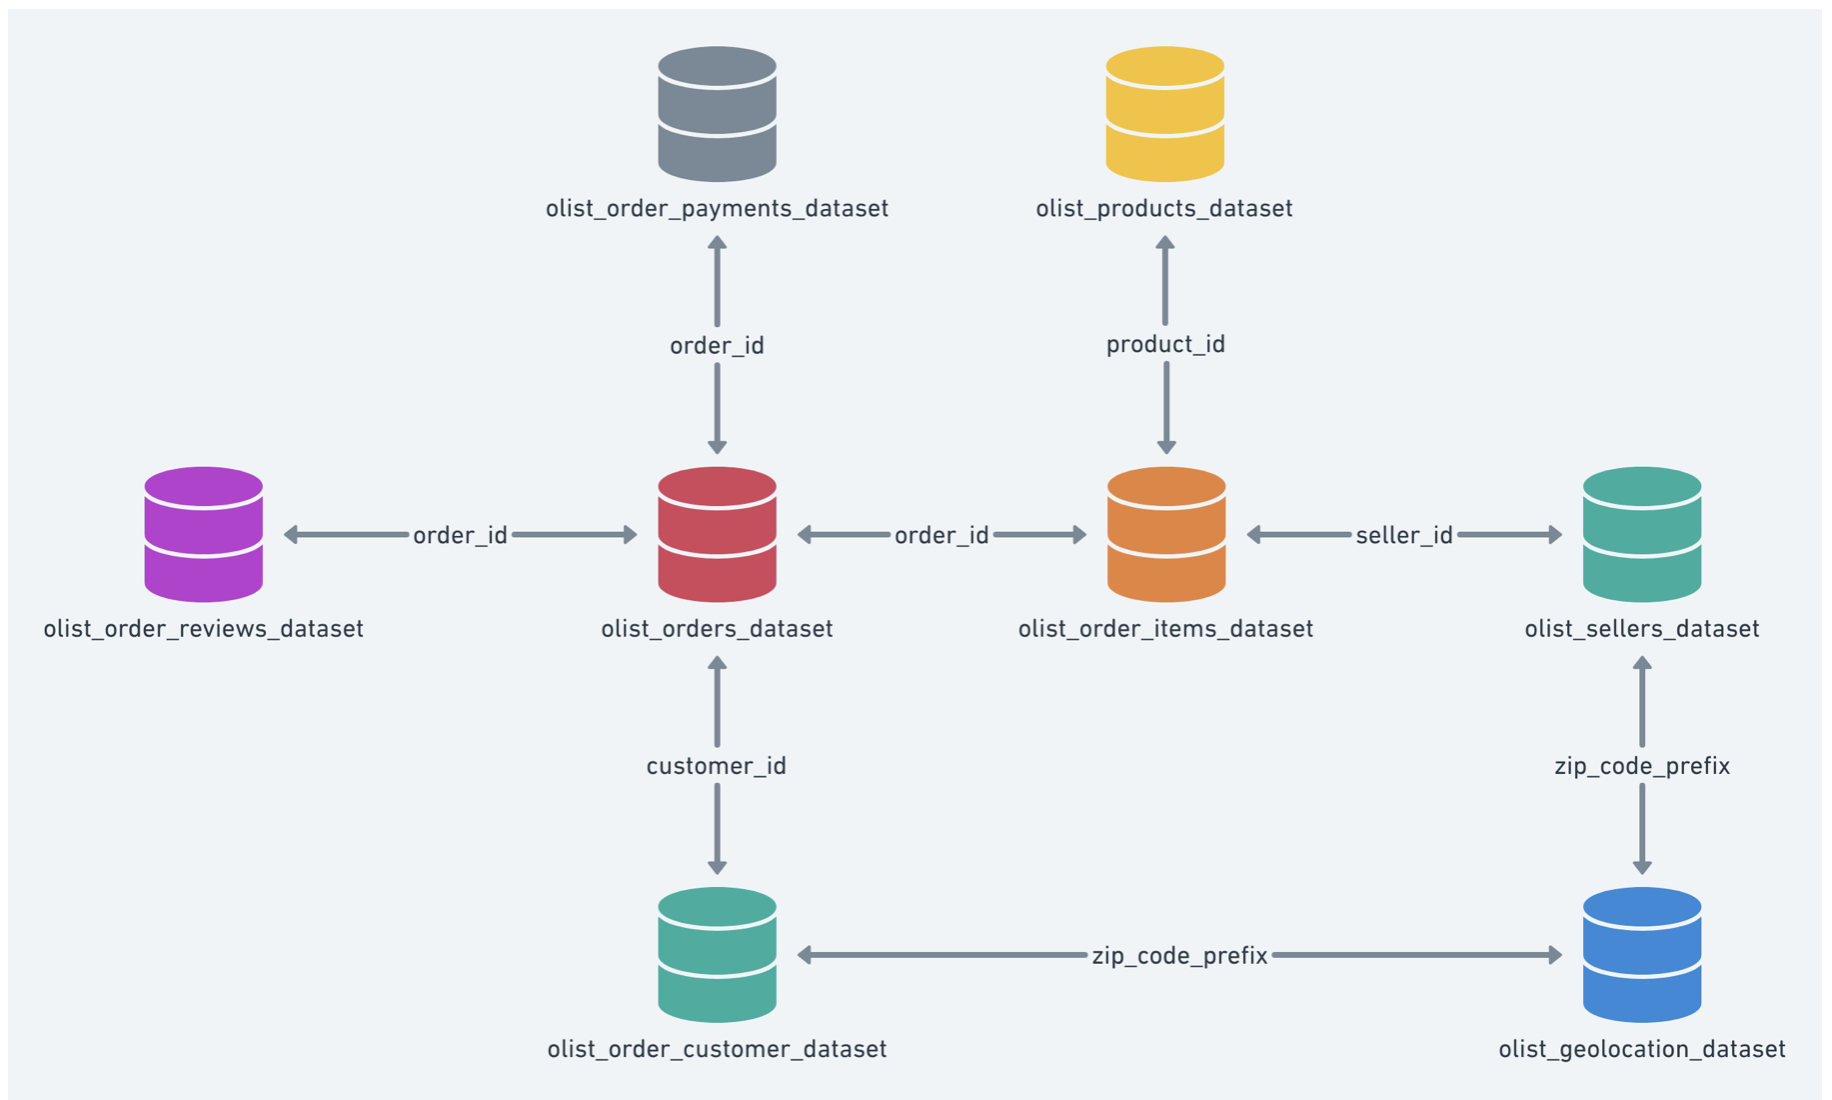

In [36]:
# show database schema
print("Database Schema")
print("===============")
Image(filename='data/schema.png')

## Fusion des infos de consumateurs: 'customers' et 'geolocation'

In [37]:
# display all the dataframes
print(*dfs.keys())

customers geolocation order_items order_payments order_reviews orders products sellers


In [38]:
dfs['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [39]:
dfs['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


In [40]:
def join_dfs(df1:pd.DataFrame, df2:pd.DataFrame, key:str, how:str='left') -> pd.DataFrame:
    print(f"{'The shape of df1:':<22}", df1.shape)
    print(f"{'The shape of df2:':<22}", df2.shape)
    df = df1.merge(df2, how=how, on=key)
    print("The shape of final df:", df.shape)
    return df

In [41]:
# change key name of geolocation
dfs["geolocation"].rename(
    columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}, inplace=True
)

# join consumers info dataframes
df = join_dfs(
    dfs["customers"],
    dfs["geolocation"],
    key="customer_zip_code_prefix",
    how="left",
)
df.head()

The shape of df1:      (99441, 5)
The shape of df2:      (19015, 5)
The shape of final df: (99441, 9)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP


In [42]:
df[["customer_city", "geolocation_city"]][
    ~(df.customer_city == df.geolocation_city)
].sample(10)

,customer_city,geolocation_city
44799,sao paulo,são paulo
67941,alvaro de carvalho,álvaro de carvalho
16316,sao paulo,são paulo
42819,sao jose do rio pardo,são josé do rio pardo
68991,santo angelo,santo ângelo
16287,sao paulo,são paulo
52995,guaxupe,guaxupé
32463,sao paulo,são paulo
38341,ipero,iperó
24117,sao paulo,são paulo


In [43]:
df[["customer_state", "geolocation_state"]][
    ~(df.customer_state == df.geolocation_state)
].sample(5)

,customer_state,geolocation_state
51094,DF,NaN
54632,RJ,NaN
9425,SP,NaN
89638,DF,NaN
18577,DF,NaN


In [44]:
df["geolocation_state"][~(df.customer_state == df.geolocation_state)].isna().all()

True

**Remarque**<br>
La différents entre les columns de 
- 'city' est l'accent. <br>
- 'state' est les valeurs manquants. <br>

Nous pouvons simplement garder l'un entre 2, celles de 'customer'.

In [45]:
# drop useless columns
df.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)
df.shape

(99441, 7)

## Fusion des infos de consumateurs avec les info de commandes: df et 'orders'

In [46]:
dfs['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [47]:
# join consumers info dataframes
df = join_dfs(df, dfs["orders"], key="customer_id", how="left")
df.head()

The shape of df1:      (99441, 7)
The shape of df2:      (99441, 8)
The shape of final df: (99441, 14)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


**Remarque**<br>
'customer_id' est désormais inutil. On peut le supprimer en tout sécurité.

In [48]:
df.drop(columns='customer_id', inplace=True)
df.shape

(99441, 13)

## Fusion avec les info d'items: df et 'orders_items'

In [49]:
dfs['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [50]:
dfs['order_items'][dfs['order_items'].order_item_id == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [51]:
print(df.order_id.nunique())
print(dfs['order_items'].order_id.nunique())
print(dfs['order_items'].shape)

99441
98666
(98666, 7)


In [52]:
# join consumers info dataframes
df = join_dfs(df, dfs["order_items"], key="order_id", how="left")
df.head()

The shape of df1:      (99441, 13)
The shape of df2:      (98666, 7)
The shape of final df: (99441, 19)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


## Fusion avec les info de produits: df et 'products'

In [53]:
dfs['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [54]:
# join consumers info dataframes
df = join_dfs(df, dfs["products"], key="product_id", how="left")
df.head()

The shape of df1:      (99441, 19)
The shape of df2:      (32951, 9)
The shape of final df: (99441, 27)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


## Fusion avec les info de paiements: df et 'order_payments'

In [55]:
dfs['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
# join consumers info dataframes
df = join_dfs(df, dfs["order_payments"], key="order_id", how="left")
df.head()

The shape of df1:      (99441, 27)
The shape of df2:      (103886, 5)
The shape of final df: (103887, 31)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25


## Fusion avec les info de revues: df et 'order_reviews'

In [57]:
dfs['order_reviews'].head()

,order_id,number_of_reviews,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0


In [58]:
# join consumers info dataframes
df = join_dfs(df, dfs["order_reviews"], key="order_id", how="left")
df.head()

The shape of df1:      (103887, 31)
The shape of df2:      (98673, 3)
The shape of final df: (103887, 33)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,number_of_reviews,review_score
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,1.0,4.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,1.0,5.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,1.0,5.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,1.0,5.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,1.0,5.0


## Fusion avec les info de vendeur: df et 'sellers'

In [59]:
dfs['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [60]:
# join consumers info dataframes
df = join_dfs(df, dfs["sellers"], key="seller_id", how="left")
df.head()

The shape of df1:      (103887, 33)
The shape of df2:      (3095, 4)
The shape of final df: (103887, 36)


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,number_of_reviews,review_score,seller_zip_code_prefix,seller_city,seller_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,1.0,credit_card,2.0,146.87,1.0,4.0,8577.0,itaquaquecetuba,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,1.0,credit_card,8.0,335.48,1.0,5.0,88303.0,itajai,SC
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,1.0,credit_card,7.0,157.73,1.0,5.0,8577.0,itaquaquecetuba,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,1.0,credit_card,1.0,173.30,1.0,5.0,8577.0,itaquaquecetuba,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,1.0,credit_card,8.0,252.25,1.0,5.0,14940.0,ibitinga,SP


In [61]:
df.drop(columns='seller_zip_code_prefix', inplace=True)
df_merged = df.copy()
df.shape

(103887, 35)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             103887 non-null  object 
 1   customer_zip_code_prefix       103887 non-null  int64  
 2   customer_city                  103887 non-null  object 
 3   customer_state                 103887 non-null  object 
 4   geolocation_lat                103600 non-null  float64
 5   geolocation_lng                103600 non-null  float64
 6   order_id                       103887 non-null  object 
 7   order_status                   103887 non-null  object 
 8   order_purchase_timestamp       103887 non-null  object 
 9   order_approved_at              103712 non-null  object 
 10  order_delivered_carrier_date   101999 non-null  object 
 11  order_delivered_customer_date  100755 non-null  object 
 12  order_estimated_delivery_date 

In [63]:
print((103887-103600)/103887*100)
print((103887-100755)/103887*100)
print((103887-103887)/103887*100)
print((103887-101556)/103887*100)
print((103887-103087)/103887*100)
print((103887-103057)/103887*100)

0.27626170743211376
3.014814173091917
0.0
2.2437841115827775
0.7700674771626864
0.7989450075562871


In [64]:
df.to_csv('data/df_merged.csv', index=False)

# Nettoyage de Données - Partie 2

## Valeurs Aberrantes

In [65]:
df = pd.read_csv('data/df_merged.csv')

In [66]:
df.shape

(103887, 35)

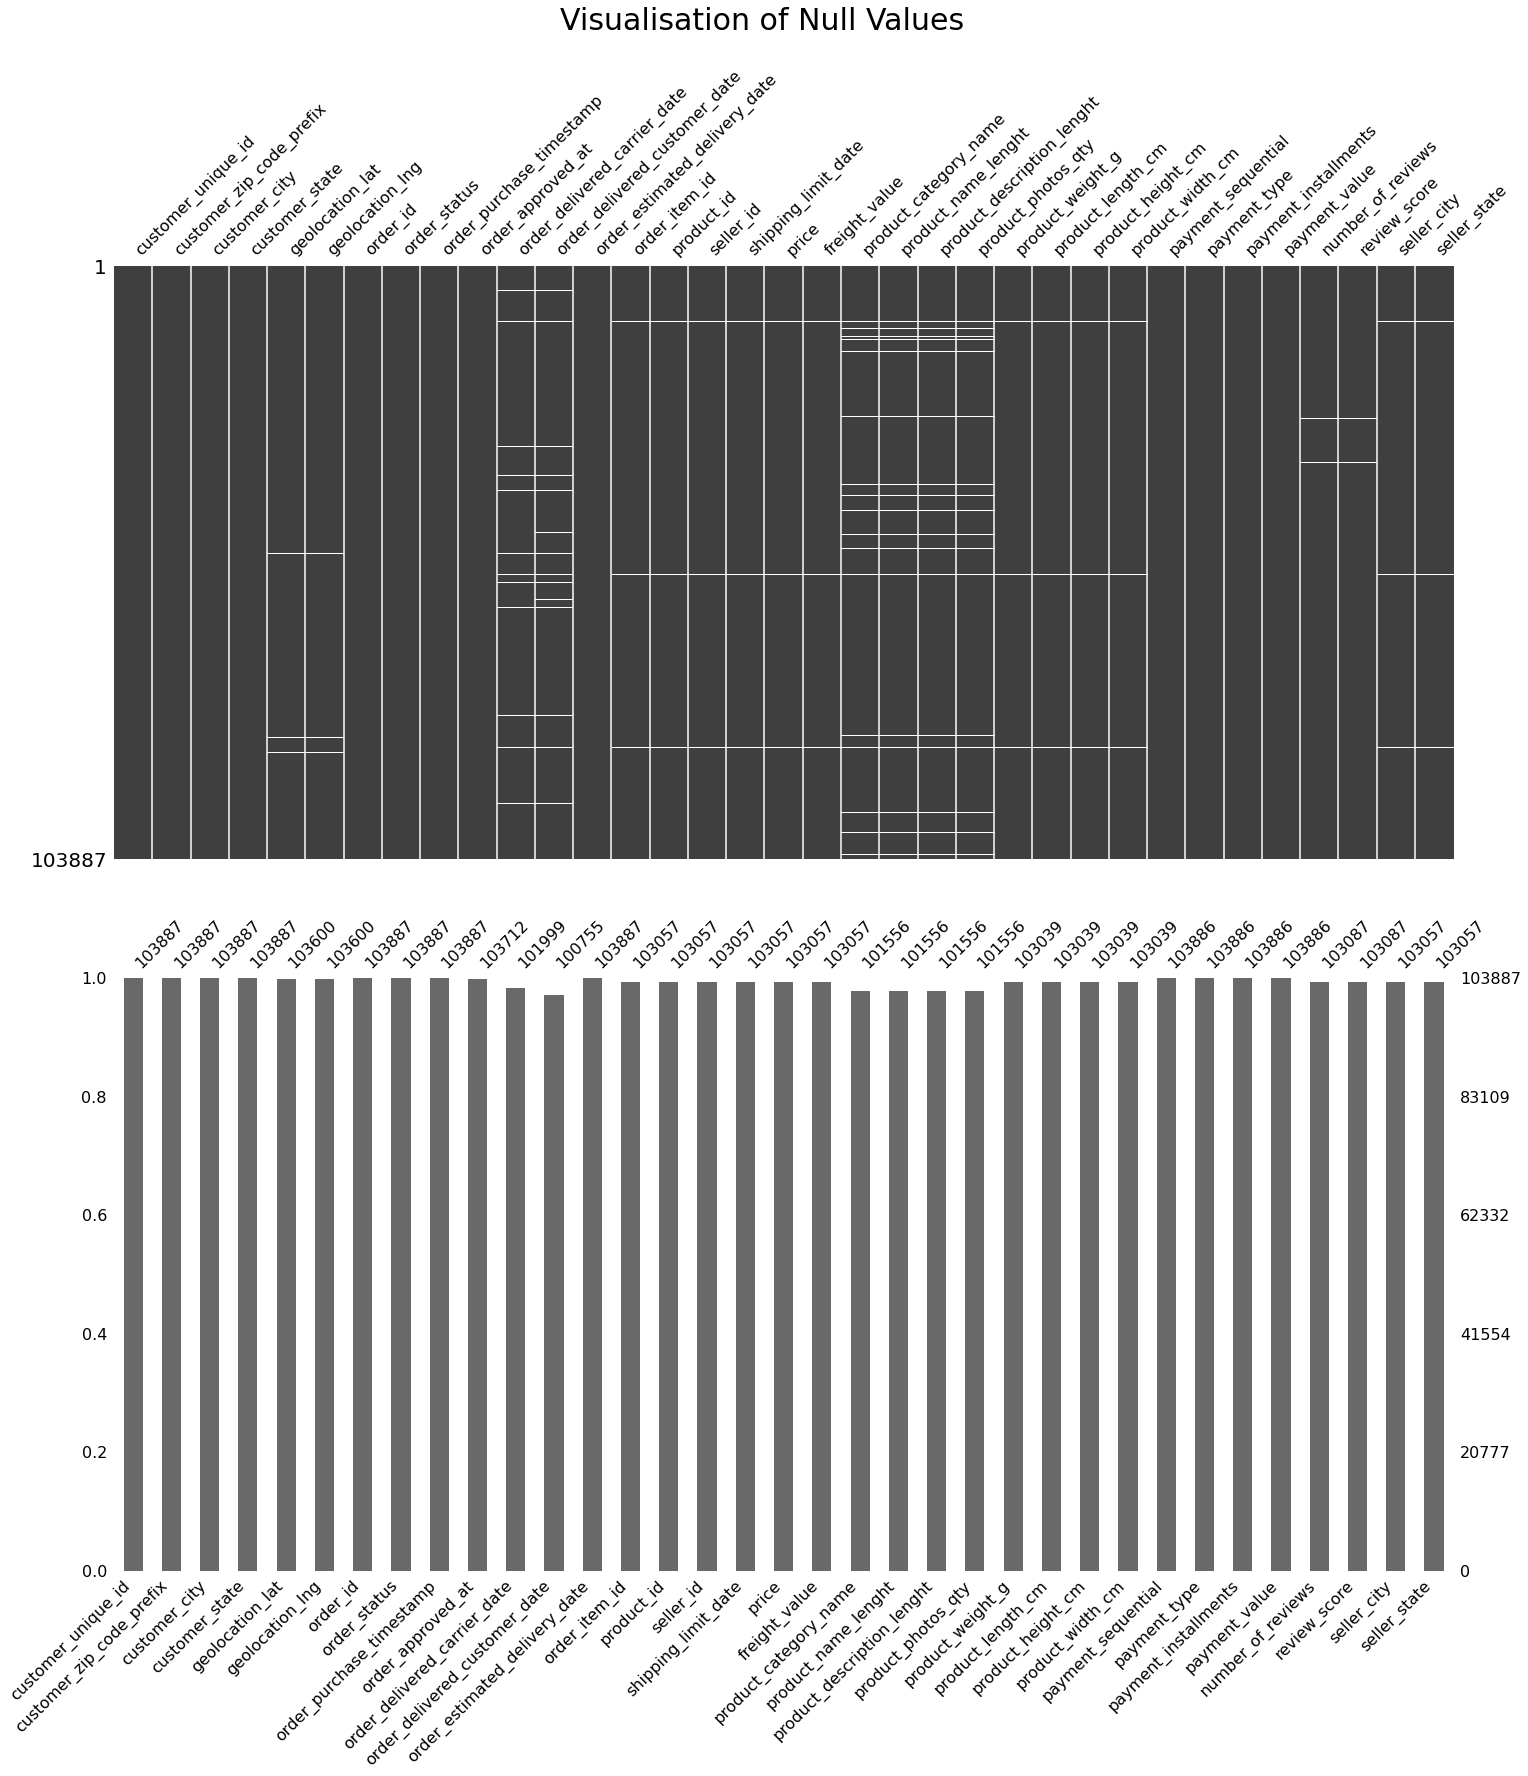

In [67]:
# check null values pattern in the merged dataframe
hp.null_visual(df, num_rows=103887)

**Remarque**<br>
Alors qu'il y a peu de données manquantes, il y a des patterns :
- entre 'order_item_id' et 'product_width_cm' + 'seller_city' et 'seller_state', trop de valeurs manquantes dans les même lignes. On va les supprimer.
- 'order_approved_at' et 'order_delivered_carrier_date' qui serviront pas grand choses pour l'anaysis et la modalisatino de suite, on va simplement les supprimer.
- 'order_delivered_customer_date' sera important pour la suite, on va eliminer tous les lignes qui contiennent des valeurs manquantes.
- Pour 'product_category_name', 'product_name_lenght', 'product_description_length' et 'product_photos_qty', on va les garder et imputer les données  manquantes.
- 'number_of_reviews' et 'review_score' vont être imputés.
- D'une façon similaire, on va également imputer 'geolocation_lat' et 'geolocation_lng'.

In [68]:
# df = df_merged.copy()

In [69]:
%%time
# remove rows that contain null values between 'order_item_id' and 'product_width_cm'
df = hp.clean_rows_na(df, col1='order_item_id', col2='product_width_cm')

Original shape: (103887, 35) 

Shape after removing null rows between 'order_item_id'
 and 'product_width_cm':

(103057, 35) 

CPU times: user 51.8 s, sys: 0 ns, total: 51.8 s
Wall time: 51.7 s


In [70]:
# drop columns 'order_approved_at' and 'order_delivered_carrier_date'
df.drop(columns=['order_approved_at', 'order_delivered_carrier_date'], axis=1, inplace=True)
df.shape

(103057, 33)

In [71]:
# remove rows that with column 'order_delivered_customer_date' having null values
df = df[df.order_delivered_customer_date.notna()]
df.shape

(100755, 33)

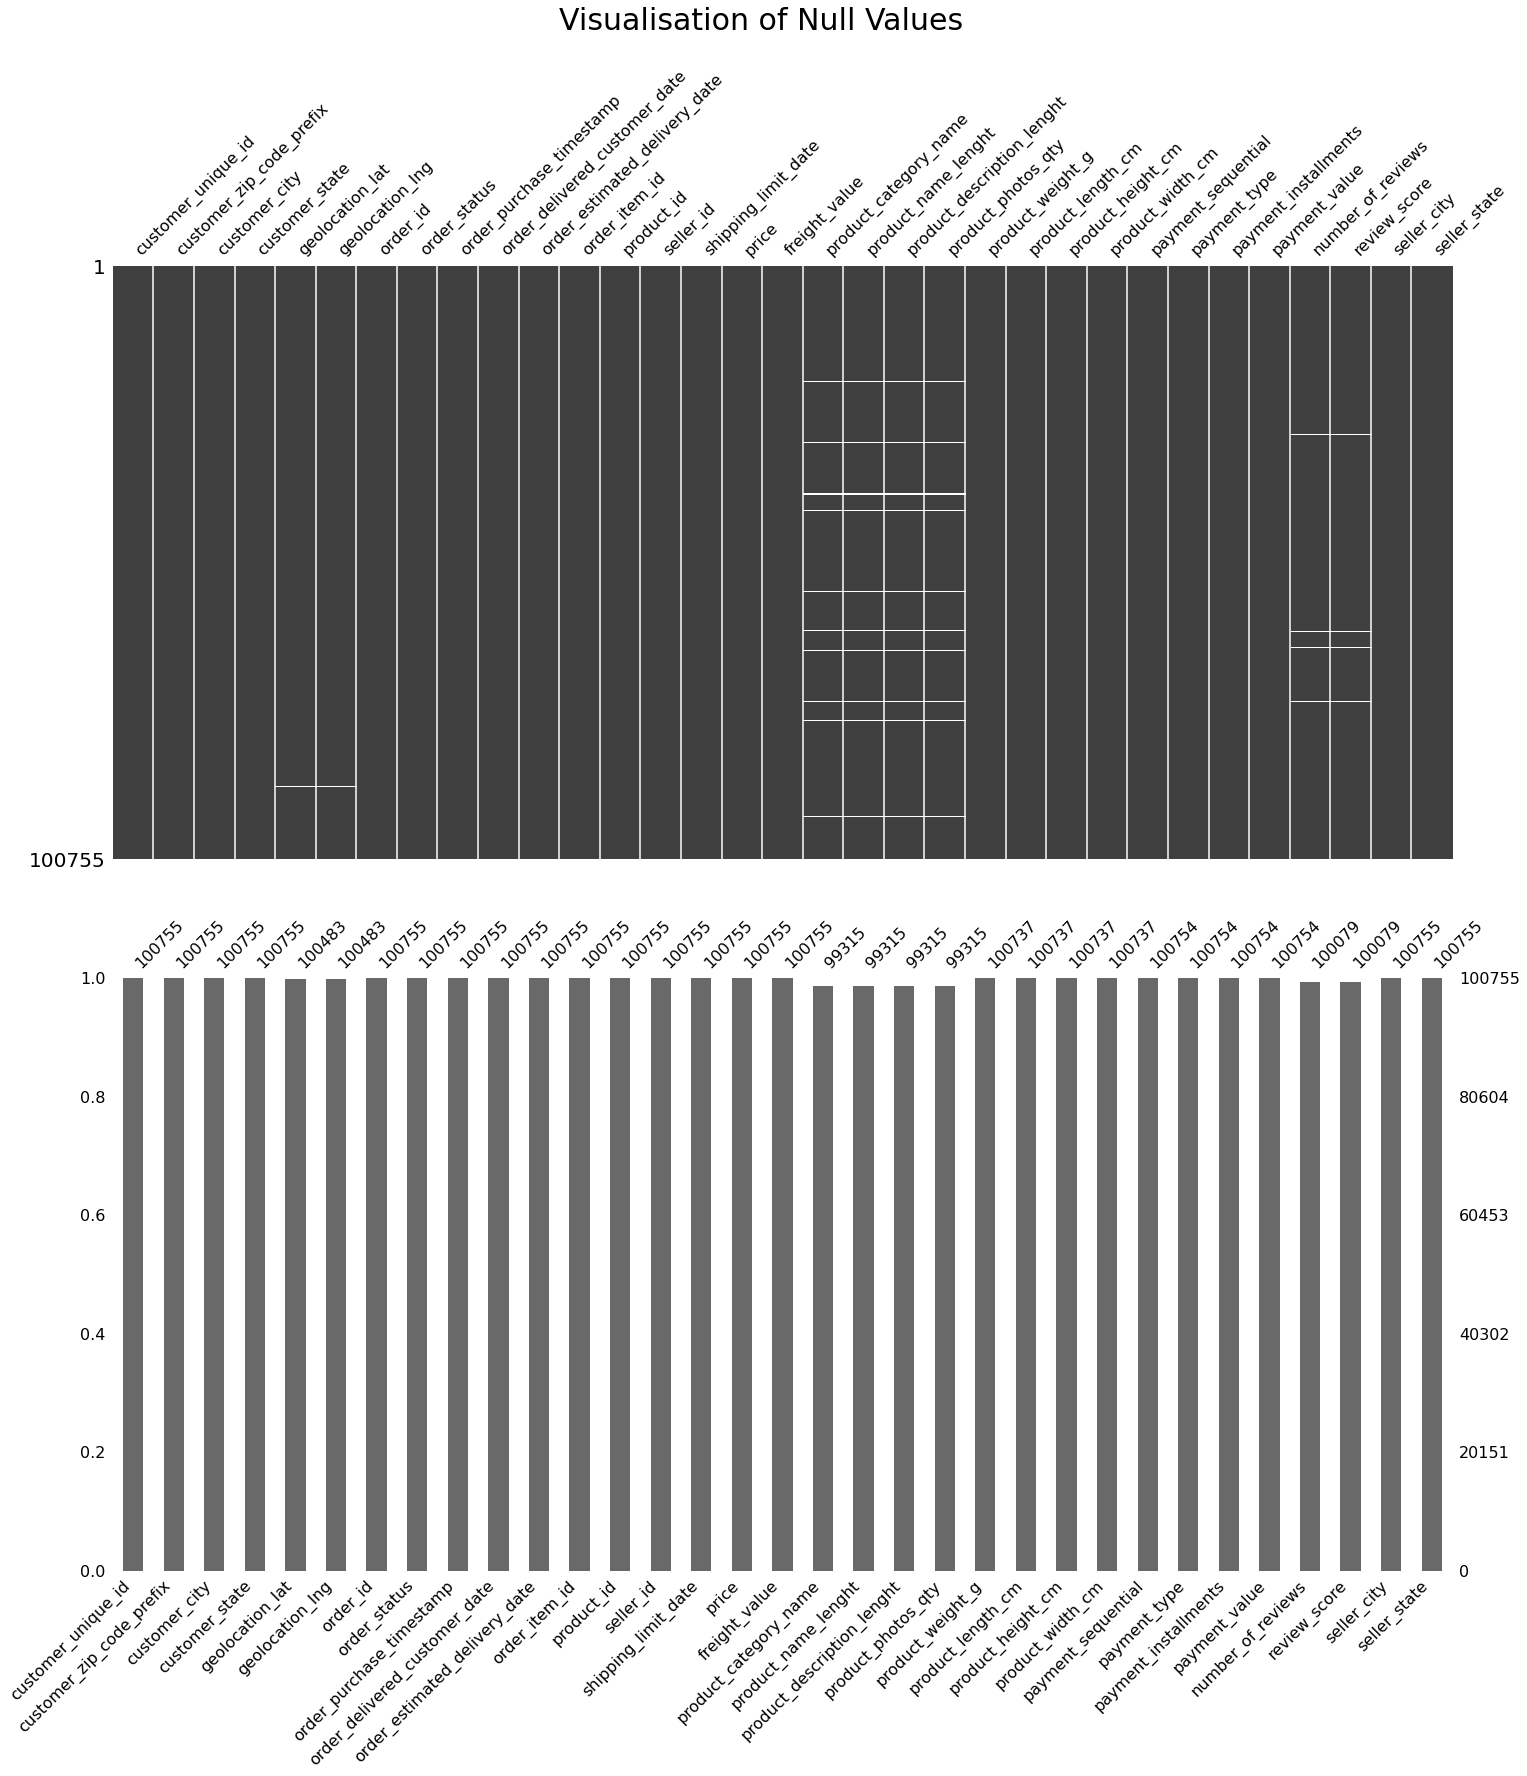

In [72]:
# re-check null values pattern in the merged dataframe
hp.null_visual(df, num_rows=100755)

**Remarque**<br>
A part 'geolocation_lat', 'geolocation_lng', 'product_category_name', 'product_name_lenght', 'product_description_length', 'product_photos_qty', 'number_of_reviews' et 'review_score', il y a encore très peu de valeurs manquantes entre 'product_wegith_g' et 'payment_value'. Comme ils sont très peu, on considère que l'on peut les supprimer en tout sécurité.

In [73]:
%%time
# remove rows that contain null values between 'product_wegith_g' and 'product_width_cm'
df = hp.clean_rows_na(df, col1='product_weight_g', col2='product_width_cm')

Original shape: (100755, 33) 

Shape after removing null rows between 'product_weight_g'
 and 'product_width_cm':

(100737, 33) 

CPU times: user 52.3 s, sys: 0 ns, total: 52.3 s
Wall time: 52.2 s


In [74]:
%%time
# remove rows that contain null values between 'payment_sequential' and 'payment_value'
df = hp.clean_rows_na(df, col1='payment_sequential', col2='payment_value')
df_clean = df.copy()

Original shape: (100737, 33) 

Shape after removing null rows between 'payment_sequential'
 and 'payment_value':

(100736, 33) 

CPU times: user 48.7 s, sys: 88.7 ms, total: 48.8 s
Wall time: 48.7 s


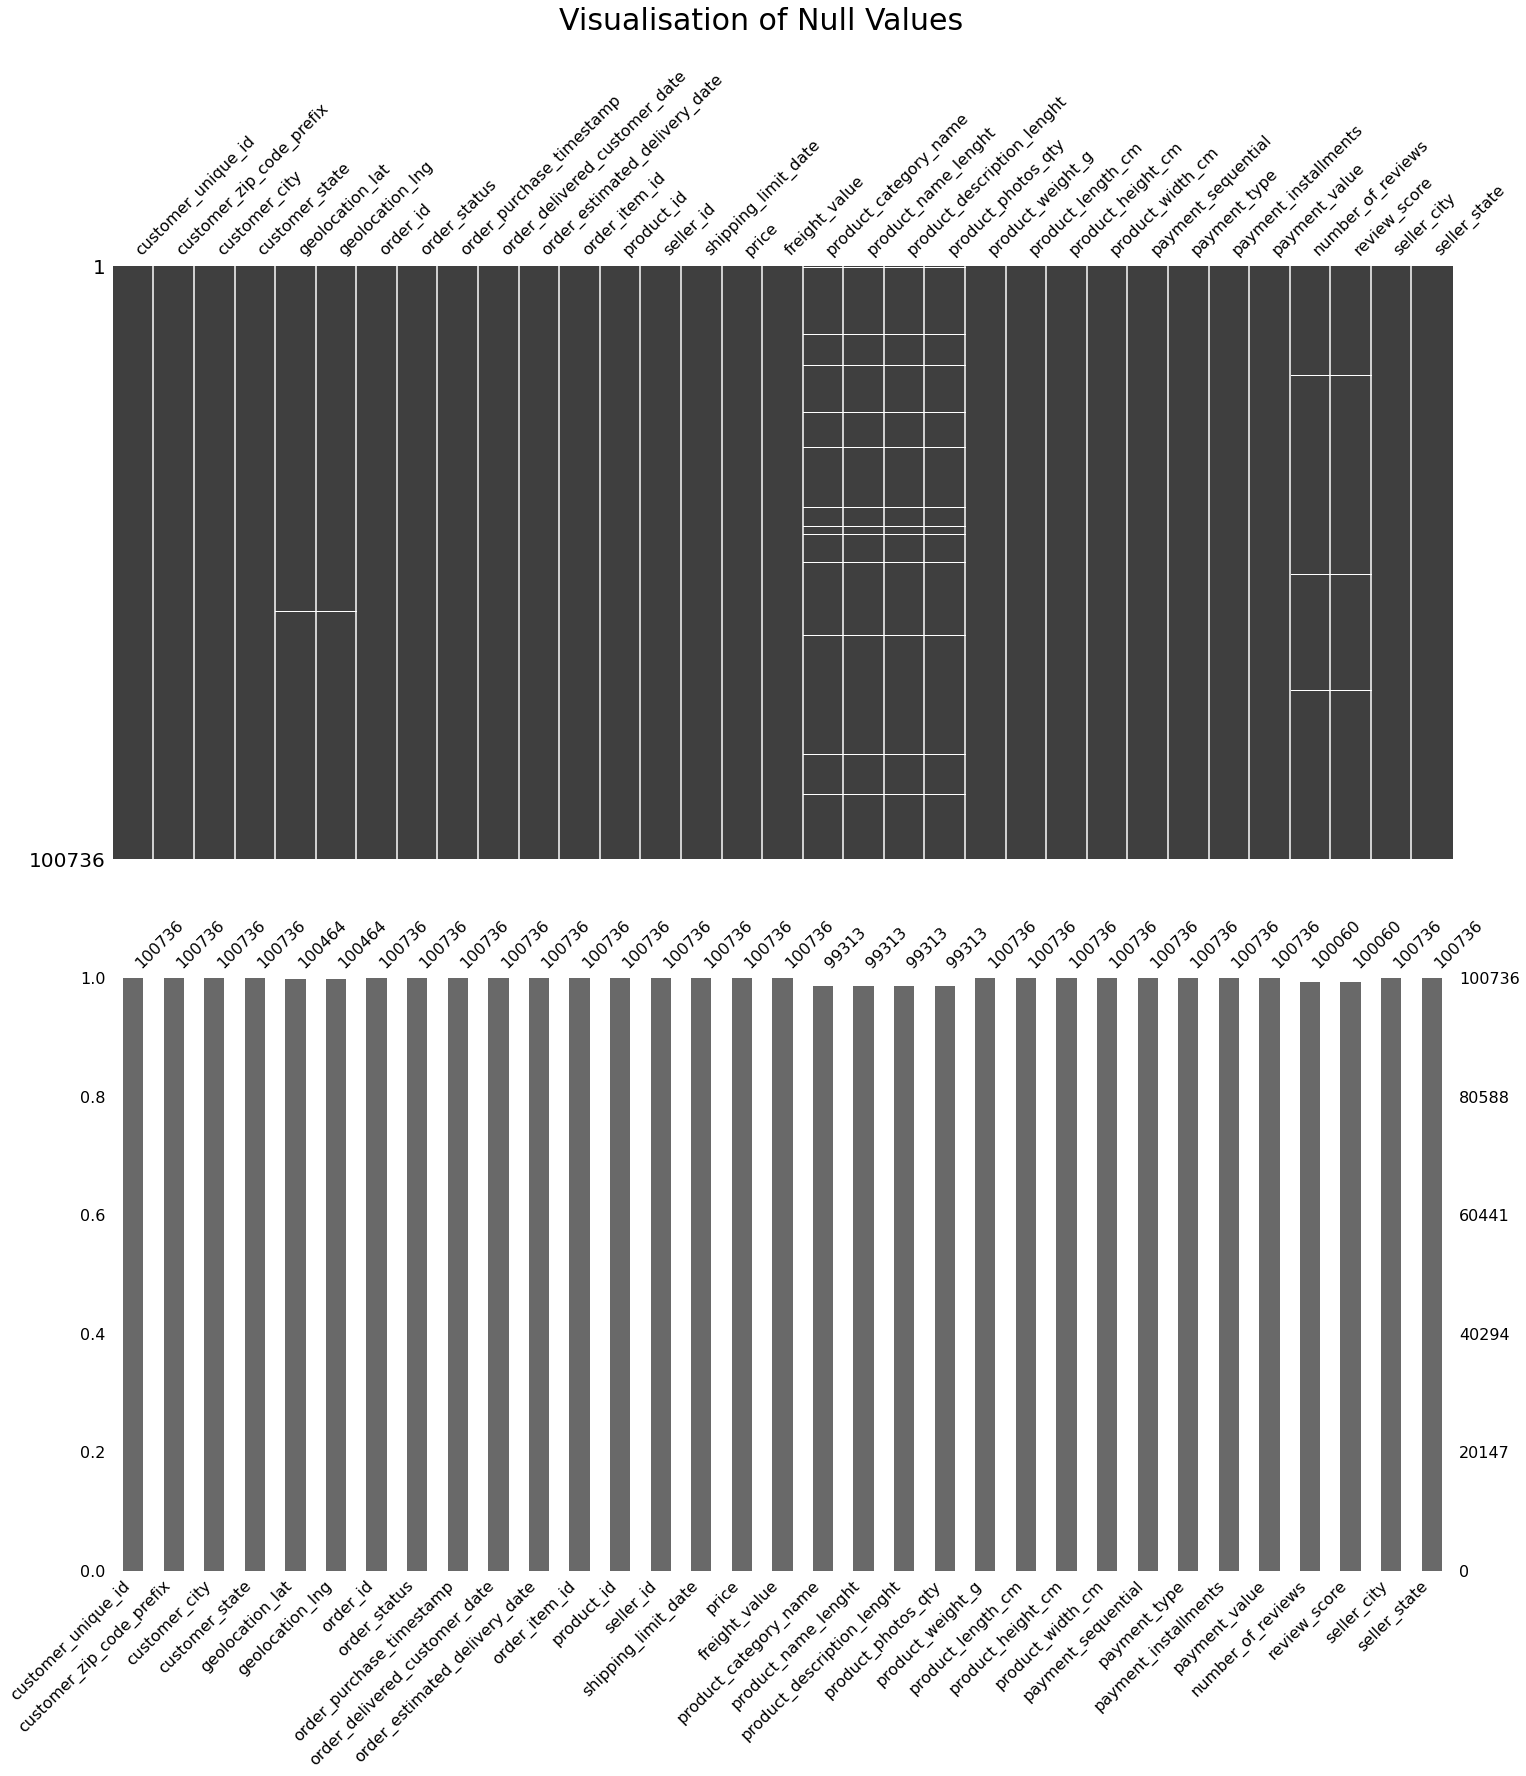

In [75]:
# re-check null values pattern in the merged dataframe
hp.null_visual(df, num_rows=100736)

## Correction d'Erreur de Frappe

In [76]:
# df = df_clean.copy()

In [77]:
df.rename(
    columns={
        "product_name_lenght": "product_name_length",
        "product_description_lenght": "product_description_length",
    },
    inplace=True
)

## Imputation de Données

### Latitude & Longitude

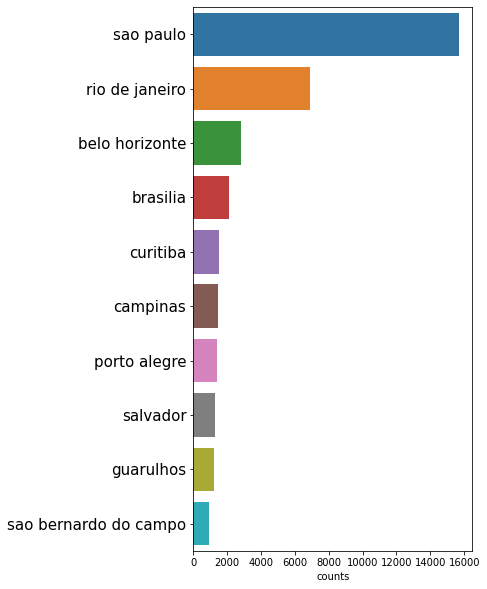

,counts
sao paulo,15698
rio de janeiro,6919
belo horizonte,2791
brasilia,2130
curitiba,1544
...,...
neopolis,1
saboeiro,1
iaras,1
sabaudia,1


In [78]:
hp.plot_barplot(df, feature='customer_city', length=10)

In [79]:
15698/len(df)*100

15.583306861499366

In [80]:
df[df.customer_city == 'sao paulo']

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,number_of_reviews,review_score,seller_city,seller_state
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,...,52.0,17.0,1.0,credit_card,7.0,157.73,1.0,5.0,itaquaquecetuba,SP
6,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,-23.584547,-46.674561,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-20 16:25:51,...,3.0,13.0,1.0,credit_card,1.0,22.77,1.0,5.0,sao paulo,SP
13,295c05e81917928d76245e842748184d,5704,sao paulo,SP,-23.628827,-46.719233,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2018-03-07 15:57:14,2018-03-15 00:46:30,...,4.0,12.0,1.0,credit_card,3.0,36.39,1.0,3.0,sao paulo,SP
18,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,-23.555015,-46.692274,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-06-07 12:02:14,...,10.0,40.0,2.0,voucher,1.0,34.05,NaN,NaN,ibitinga,SP
19,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,-23.555015,-46.692274,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-06-07 12:02:14,...,10.0,40.0,1.0,credit_card,1.0,67.98,NaN,NaN,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100699,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,-23.560124,-46.620808,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-26 19:18:32,...,30.0,45.0,1.0,boleto,1.0,121.04,1.0,3.0,sao paulo,SP
100701,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,-23.635804,-46.638032,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-30 17:06:19,...,16.0,16.0,1.0,credit_card,1.0,30.95,1.0,4.0,piracicaba,SP
100713,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,-23.626153,-46.746920,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-06 23:32:21,...,16.0,11.0,1.0,credit_card,3.0,92.36,1.0,5.0,sao paulo,SP
100714,aaf22868003377e859049dcf5f0b3fdf,1323,sao paulo,SP,-23.563601,-46.640969,52b783557d95971d0b42195e6bacdc68,delivered,2017-10-20 07:16:27,2017-10-24 17:03:38,...,4.0,12.0,1.0,credit_card,1.0,32.77,1.0,5.0,sao paulo,SP


In [81]:
len(df.geolocation_lat[df.geolocation_lat.isna() & df.geolocation_lng.isna()])

272

In [82]:
# Impute the latitude and longitude values with those of Sau Paulo
df.geolocation_lat[df.geolocation_lat.isna()] = -23.53377
df.geolocation_lng[df.geolocation_lng.isna()] = -46.625290

In [83]:
len(df.geolocation_lat[df.geolocation_lat.isna() & df.geolocation_lng.isna()])

0

### Revues

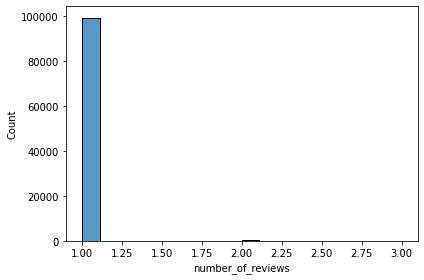

In [84]:
hp.plot_histplots(df.number_of_reviews, subplot=False)

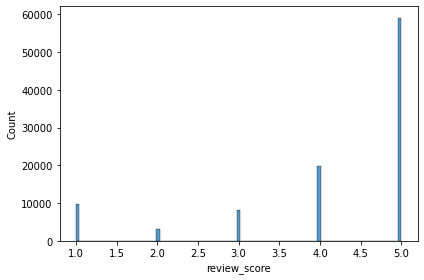

In [85]:
hp.plot_histplots(df.review_score, subplot=False)

In [86]:
print(len(df.number_of_reviews[df.number_of_reviews.isna()]))
print(len(df.review_score[df.review_score.isna()]))

676
676


In [87]:
print(len(df[df.number_of_reviews.isna()])/len(df)*100)
print(len(df[df.review_score.isna()])/len(df)*100)

0.6710609911054638
0.6710609911054638


In [88]:
df.number_of_reviews[df.number_of_reviews.isna()] = 0
df.review_score[df.review_score.isna()] =0

In [89]:
print(len(df.number_of_reviews[df.number_of_reviews.isna()]))
print(len(df.review_score[df.review_score.isna()]))

0
0


### Produits

In [90]:
print(len(df.product_category_name[df.product_category_name.isna()]))
print(len(df.product_name_length[df.product_name_length.isna()]))
print(len(df.product_description_length[df.product_description_length.isna()]))
print(len(df.product_photos_qty[df.product_photos_qty.isna()]))
print(
    len(
        df[
            df.product_category_name.isna()
            & df.product_name_length.isna()
            & df.product_description_length.isna()
            & df.product_photos_qty.isna()
        ]
    )
)

1423
1423
1423
1423
1423


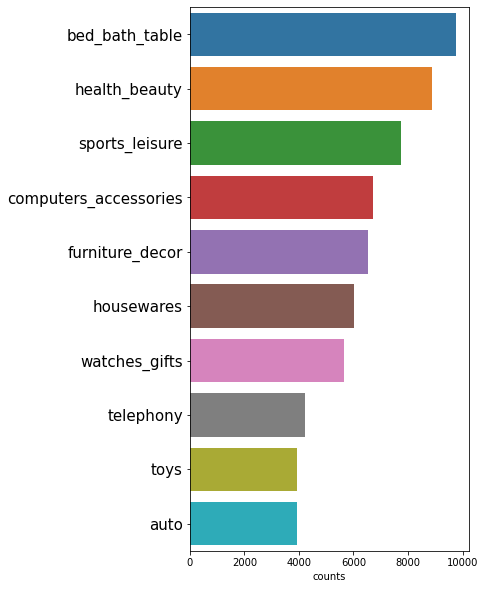

,counts
bed_bath_table,9744
health_beauty,8881
sports_leisure,7762
computers_accessories,6728
furniture_decor,6536
...,...
kitchen_laptops and food_preparers,13
cds_dvds_musicals,12
pc_gamer,7
fashion_childrens_clothes,7


In [91]:
hp.plot_barplot(df, feature='product_category_name', length=10)

Number of quantitaive columns: 3


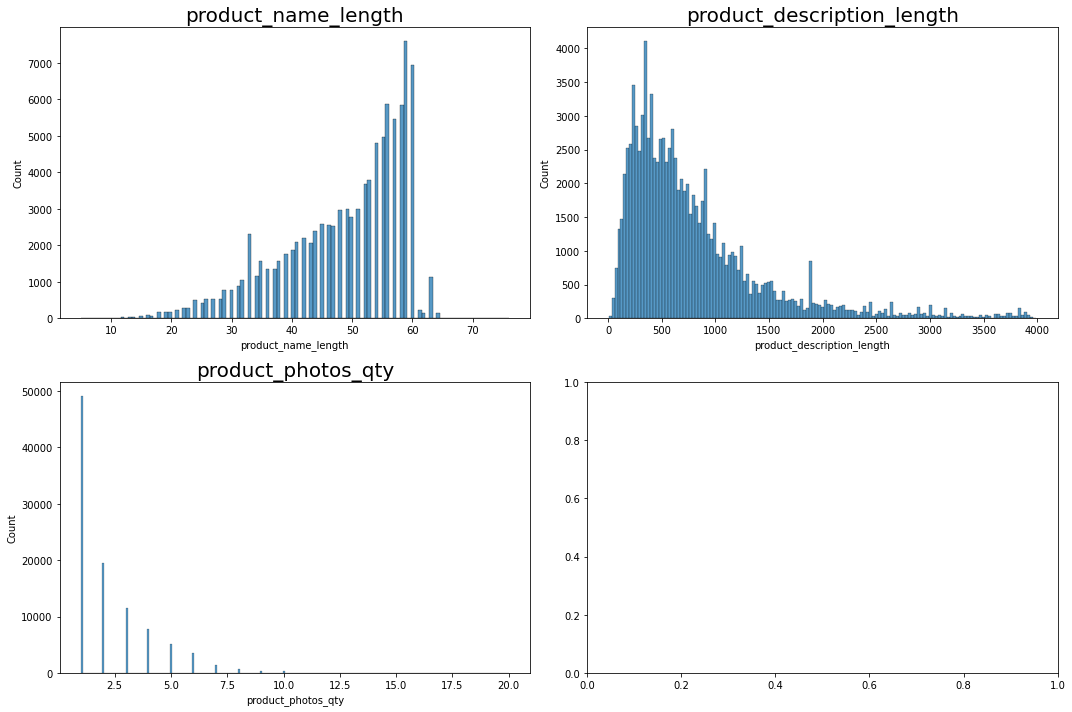

In [92]:
hp.plot_histplots(df[['product_name_length', 'product_description_length',
       'product_photos_qty']], figsize=(15, 10), sub_col=2)

Number of quantitaive columns: 3


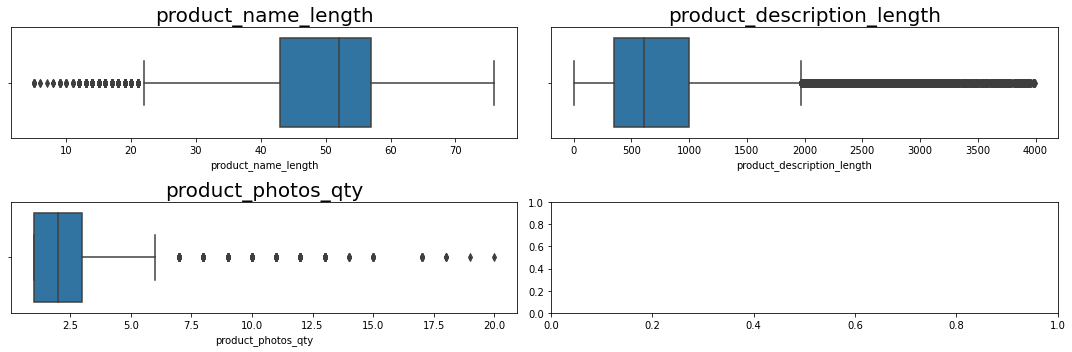

In [93]:
hp.plot_boxplots(df[['product_name_length', 'product_description_length',
       'product_photos_qty']], figsize=(15, 5), sub_col=2)

In [94]:
df[['product_name_length', 'product_description_length']].describe()

,product_name_length,product_description_length
count,99313.000000,99313.000000
mean,48.876834,792.049691
std,9.989731,653.784950
min,5.000000,4.000000
25%,43.000000,348.000000
50%,52.000000,606.000000
75%,57.000000,995.000000
max,76.000000,3992.000000


In [95]:
print(df.product_name_length[df.product_name_length==0])
print(df.product_description_length[df.product_description_length==0])
print(df.product_photos_qty[df.product_photos_qty==0])

Series([], Name: product_name_length, dtype: float64)
Series([], Name: product_description_length, dtype: float64)
Series([], Name: product_photos_qty, dtype: float64)


In [96]:
df.product_category_name[df.product_category_name.isna()] = 'missing'
df.product_name_length[df.product_name_length.isna()] = 0
df.product_description_length[df.product_description_length.isna()] = 0
df.product_photos_qty[df.product_photos_qty.isna()] = 0
df_impute = df.copy()

In [97]:
print(len(df.product_category_name[df.product_category_name.isna()]))
print(len(df.product_name_length[df.product_name_length.isna()]))
print(len(df.product_description_length[df.product_description_length.isna()]))
print(len(df.product_photos_qty[df.product_photos_qty.isna()]))
print(
    len(
        df[
            df.product_category_name.isna()
            & df.product_name_length.isna()
            & df.product_description_length.isna()
            & df.product_photos_qty.isna()
        ]
    )
)

0
0
0
0
0


In [98]:
df.isnull().any()

customer_unique_id               False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
geolocation_lat                  False
geolocation_lng                  False
order_id                         False
order_status                     False
order_purchase_timestamp         False
order_delivered_customer_date    False
order_estimated_delivery_date    False
order_item_id                    False
product_id                       False
seller_id                        False
shipping_limit_date              False
price                            False
freight_value                    False
product_category_name            False
product_name_length              False
product_description_length       False
product_photos_qty               False
product_weight_g                 False
product_length_cm                False
product_height_cm                False
product_width_cm                 False
payment_sequential       

## Datetime

In [99]:
# df = df_impute.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             100736 non-null  object 
 1   customer_zip_code_prefix       100736 non-null  int64  
 2   customer_city                  100736 non-null  object 
 3   customer_state                 100736 non-null  object 
 4   geolocation_lat                100736 non-null  float64
 5   geolocation_lng                100736 non-null  float64
 6   order_id                       100736 non-null  object 
 7   order_status                   100736 non-null  object 
 8   order_purchase_timestamp       100736 non-null  object 
 9   order_delivered_customer_date  100736 non-null  object 
 10  order_estimated_delivery_date  100736 non-null  object 
 11  order_item_id                  100736 non-null  float64
 12  product_id                    

In [100]:
cols_date = [col for col in df.columns if "timestamp" in col or "date" in col]
df[cols_date].head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-22 15:22:12
1,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-18 20:58:32
2,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-06-05 16:19:10
3,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-27 16:31:16
4,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-31 10:10:09


In [101]:
for col in cols_date:
    df[col] = pd.to_datetime(df[col])
df_dt = df.copy()
df[cols_date].head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12
1,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,2018-01-18 20:58:32
2,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,2018-06-05 16:19:10
3,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,2018-03-27 16:31:16
4,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,2018-07-31 10:10:09


In [102]:
df[cols_date].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       100736 non-null  datetime64[ns]
 1   order_delivered_customer_date  100736 non-null  datetime64[ns]
 2   order_estimated_delivery_date  100736 non-null  datetime64[ns]
 3   shipping_limit_date            100736 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.1 MB


# Analyses de Données

In [103]:
df = df_dt.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             100736 non-null  object        
 1   customer_zip_code_prefix       100736 non-null  int64         
 2   customer_city                  100736 non-null  object        
 3   customer_state                 100736 non-null  object        
 4   geolocation_lat                100736 non-null  float64       
 5   geolocation_lng                100736 non-null  float64       
 6   order_id                       100736 non-null  object        
 7   order_status                   100736 non-null  object        
 8   order_purchase_timestamp       100736 non-null  datetime64[ns]
 9   order_delivered_customer_date  100736 non-null  datetime64[ns]
 10  order_estimated_delivery_date  100736 non-null  datetime64[ns]
 11  

In [104]:
df[['customer_zip_code_prefix', 'order_item_id']] = df[['customer_zip_code_prefix', 'order_item_id']].astype('object')
df_id_str = df.copy()
df[['customer_zip_code_prefix', 'order_item_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_zip_code_prefix  100736 non-null  object
 1   order_item_id             100736 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [105]:
df.describe()

,geolocation_lat,geolocation_lng,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,number_of_reviews,review_score
count,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000,100736.000000
mean,-21.199351,-46.172124,125.355267,20.214594,48.186398,780.861172,2.217082,2115.906081,30.181742,16.482638,23.080289,1.088360,2.851672,153.063971,0.998938,4.126818
std,5.606724,4.064010,190.835564,15.862104,11.474099,655.845646,1.752341,3787.814868,16.109395,13.307371,11.763254,0.652758,2.684446,214.392129,0.111523,1.324237
min,-36.605374,-72.666706,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-23.587597,-48.089162,41.330000,13.330000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,56.780000,1.000000,4.000000
50%,-22.926905,-46.628199,79.000000,16.390000,52.000000,599.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,1.000000,100.000000,1.000000,5.000000
75%,-20.149791,-43.606901,139.770000,21.260000,57.000000,986.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,1.000000,4.000000,171.292500,1.000000,5.000000
max,42.184003,-8.577855,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000,24.000000,13664.080000,3.000000,5.000000


## Analyses Univariée - Qualitative

In [106]:
# df = df_id_str.copy()

In [107]:
# create a df that containes only qualitative features
df_quali = hp.create_quali_df(df)
df_quali.shape

(100736, 13)

In [108]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_unique_id        100736 non-null  object
 1   customer_zip_code_prefix  100736 non-null  object
 2   customer_city             100736 non-null  object
 3   customer_state            100736 non-null  object
 4   order_id                  100736 non-null  object
 5   order_status              100736 non-null  object
 6   order_item_id             100736 non-null  object
 7   product_id                100736 non-null  object
 8   seller_id                 100736 non-null  object
 9   product_category_name     100736 non-null  object
 10  payment_type              100736 non-null  object
 11  seller_city               100736 non-null  object
 12  seller_state              100736 non-null  object
dtypes: object(13)
memory usage: 10.0+ MB


In [109]:
hp.check_unique(df_quali)

Number of unique values for each column
customer_unique_id: 93342
customer_zip_code_prefix: 14888
customer_city: 4084
customer_state: 27
order_id: 96459
order_status: 2
order_item_id: 1
product_id: 31151
seller_id: 2960
product_category_name: 74
payment_type: 4
seller_city: 595
seller_state: 22


In [110]:
# drop unnecessary columns
quali_col_to_drop = [col for col in df_quali.columns if "id" in col or "zip" in col or "city" in col]
df_quali_dense = df_quali.drop(quali_col_to_drop, axis=1)

In [111]:
hp.check_unique(df_quali_dense)

Number of unique values for each column
customer_state: 27
order_status: 2
product_category_name: 74
payment_type: 4
seller_state: 22


Number of qualitaive columns: 5


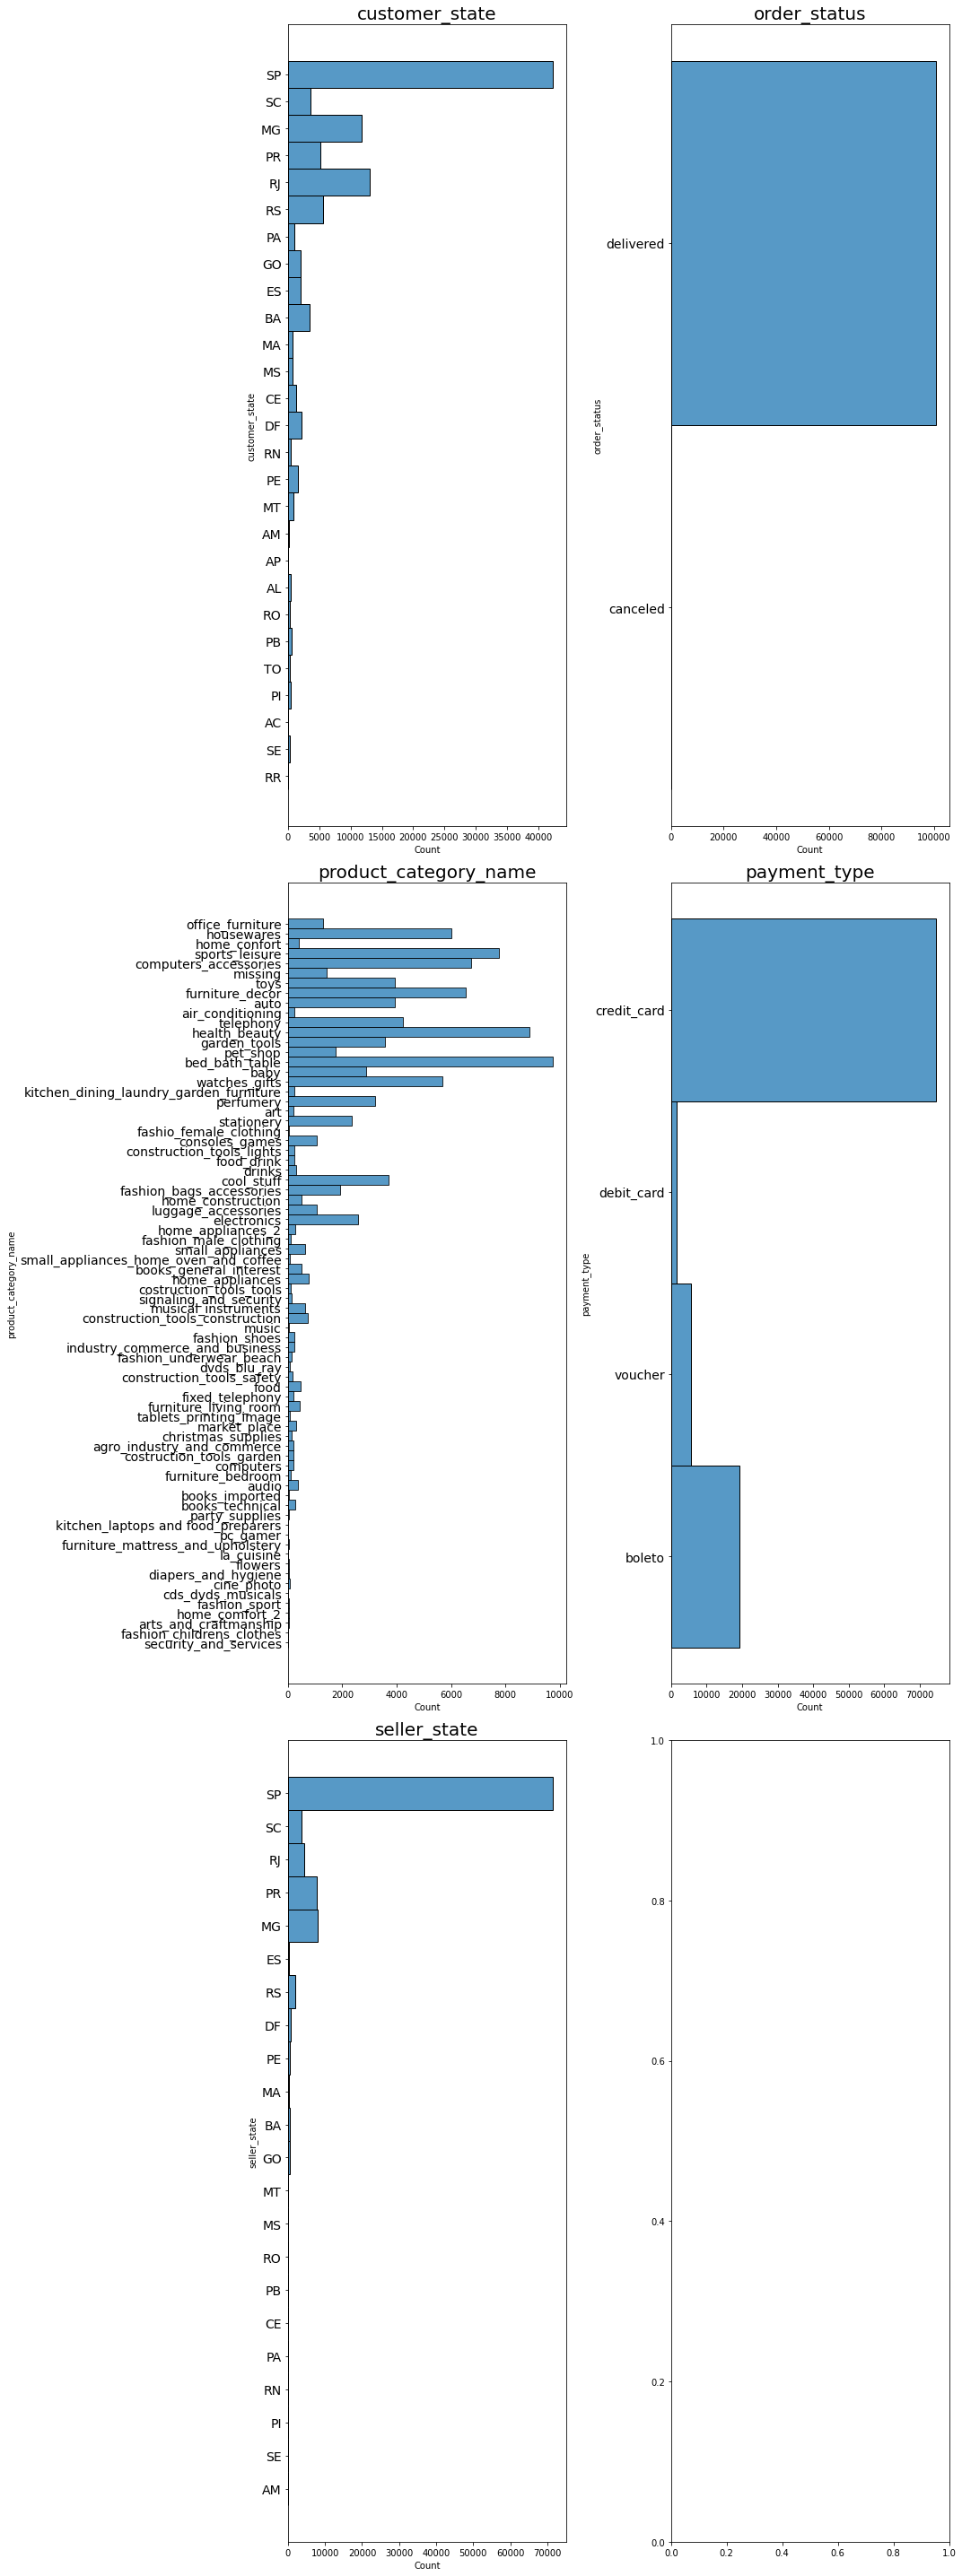

CPU times: user 3.6 s, sys: 426 ms, total: 4.03 s
Wall time: 3.79 s


In [112]:
%%time
# plot histogram for quantitative variables
hp.plot_histplots(
    df,
    var_type="qual",
    drop_cols=quali_col_to_drop,
    figsize=(15, 40),
    sub_col=2,
    ticksize=14,
)

Number of qualitaive columns: 3


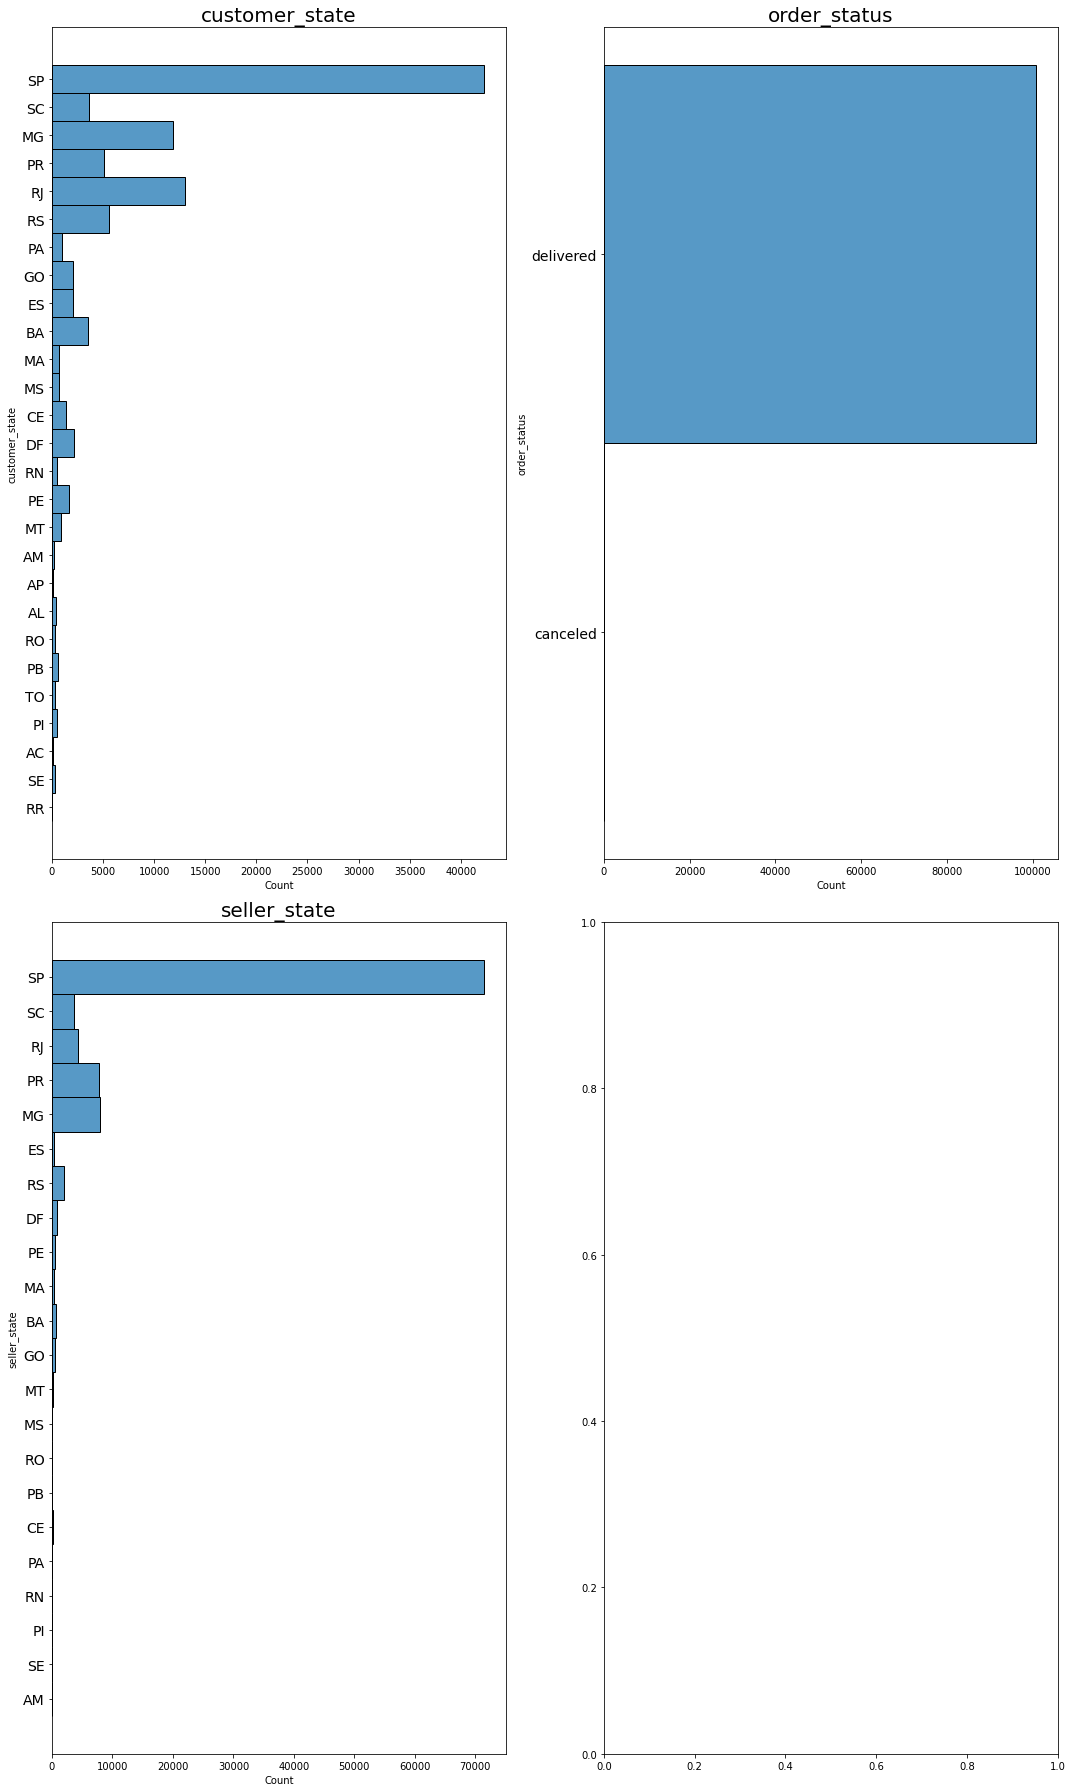

CPU times: user 1.63 s, sys: 233 ms, total: 1.86 s
Wall time: 1.62 s


In [113]:
%%time
quali_col_to_drop2 = quali_col_to_drop + ['product_category_name', 'payment_type']
# plot histogram for quantitative variables
hp.plot_histplots(df, var_type='qual', drop_cols=quali_col_to_drop2, figsize=(15, 25), sub_col=2, ticksize=14)

In [114]:
hp.list_unique(df_quali_dense)

customer_state:
['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA', 'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB', 'TO', 'PI', 'AC', 'SE', 'RR']

order_status:
['delivered', 'canceled']

product_category_name:
['office_furniture', 'housewares', 'home_confort', 'sports_leisure', 'computers_accessories', 'missing', 'toys', 'furniture_decor', 'auto', 'air_conditioning', 'telephony', 'health_beauty', 'garden_tools', 'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts', 'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art', 'stationery', 'fashio_female_clothing', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'fashion_bags_accessories', 'home_construction', 'luggage_accessories', 'electronics', 'home_appliances_2', 'fashion_male_clothing', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'books_general_interest', 'home_appliances', 'costruction_tools_tools', 'signaling_and_security', 'musical_instru

In [115]:
# set up grouping list
group_dict = {
    "houseware": [
        "housewares",
        "home_confort",
        "home_comfort_2",
        "furniture_decor",
        "furniture_living_room",
        "bed_bath_table",
        "furniture_bedroom",
        "kitchen_dining_laundry_garden_furniture",
        "kitchen_laptops and food_preparers",
        "furniture_mattress_and_upholstery",
        "la_cuisine",
    ],
    "home_appliances": [
        "home_appliances",
        "home_appliances_2",
        "air_conditioning",
        "small_appliances",
        "small_appliances_home_oven_and_coffee",
    ],
    "books": ["books_general_interest", "books_imported", "books_technical"],
    "health_beauty": [
        "health_beauty",
        "perfumery",
    ],
    "baby_kids": ["baby", "diapers_and_hygiene", "toys"],
    "garden_tools": ["garden_tools", "flowers", "agro_industry_and_commerce"],
    "art": [
        "art",
        "cine_photo",
        "arts_and_craftmanship",
    ],
    "office_furniture": ["office_furniture", "stationery"],
    "food_drink": ["food_drink", "drinks", "food"],
    "entertainment_sports": [
        "music",
        "musical_instruments",
        "cds_dvds_musicals",
        "audio",
        "dvds_blu_ray",
        "sports_leisure",
    ],
    "video_games": [
        "consoles_games",
        "pc_gamer",
    ],
    "fashion": [
        "fashio_female_clothing",
        "fashion_male_clothing",
        "fashion_bags_accessories",
        "fashion_sport",
        "fashion_shoes",
        "fashion_underwear_beach",
        "fashion_childrens_clothes",
    ],
    "electronics": [
        "electronics",
        "telephony",
        "fixed_telephony",
        "computers_accessories",
        "computers",
        "tablets_printing_image",
    ],
    "home_construction": [
        "home_construction",
        "construction_tools_lights",
        "construction_tools_safety",
        "costruction_tools_garden",
        "construction_tools_construction",
        "costruction_tools_tools",
    ],
    "security": ["signaling_and_security", "security_and_services"],
    "others": [
        "market_place",
        "luggage_accessories",
        "industry_commerce_and_business",
        "party_supplies",
        "christmas_supplies",
        "pet_shop",
    ],
    "cool_stuff": [
        "cool_stuff",
    ],
    "watches_gifts": [
        "watches_gifts",
    ],
    "auto": [
        "auto",
    ],
    "missing": ["missing"],
}

In [116]:
for key, value in group_dict.items():
    df.product_category_name[df.product_category_name.isin(group_dict[key])] = key
df_group_cat = df.copy()
df.product_category_name.nunique()

20

Number of qualitaive columns: 5


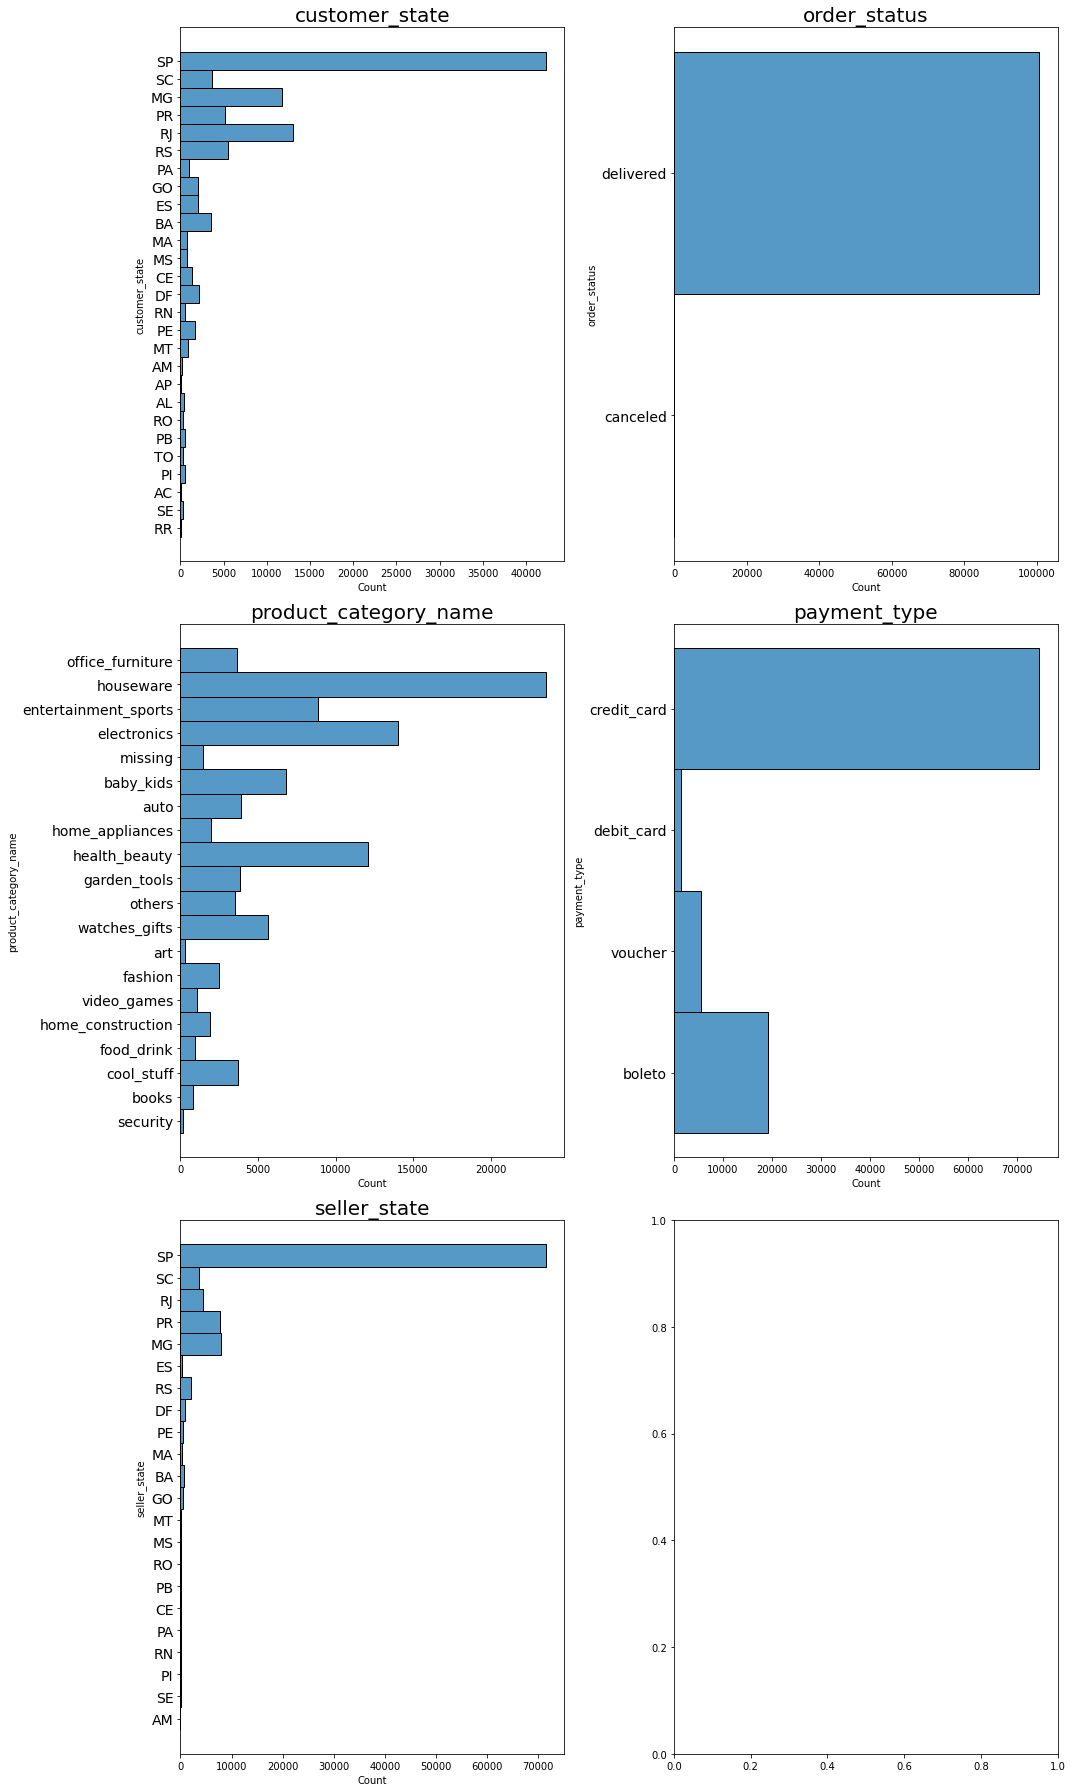

CPU times: user 2.13 s, sys: 265 ms, total: 2.39 s
Wall time: 2.15 s


In [117]:
%%time
# plot histogram for quantitative variables
hp.plot_histplots(df, var_type='qual', drop_cols=quali_col_to_drop, figsize=(15, 25), sub_col=2, ticksize=14)

## Analyses Univariée - Quantitative

Number of quantitaive columns: 16


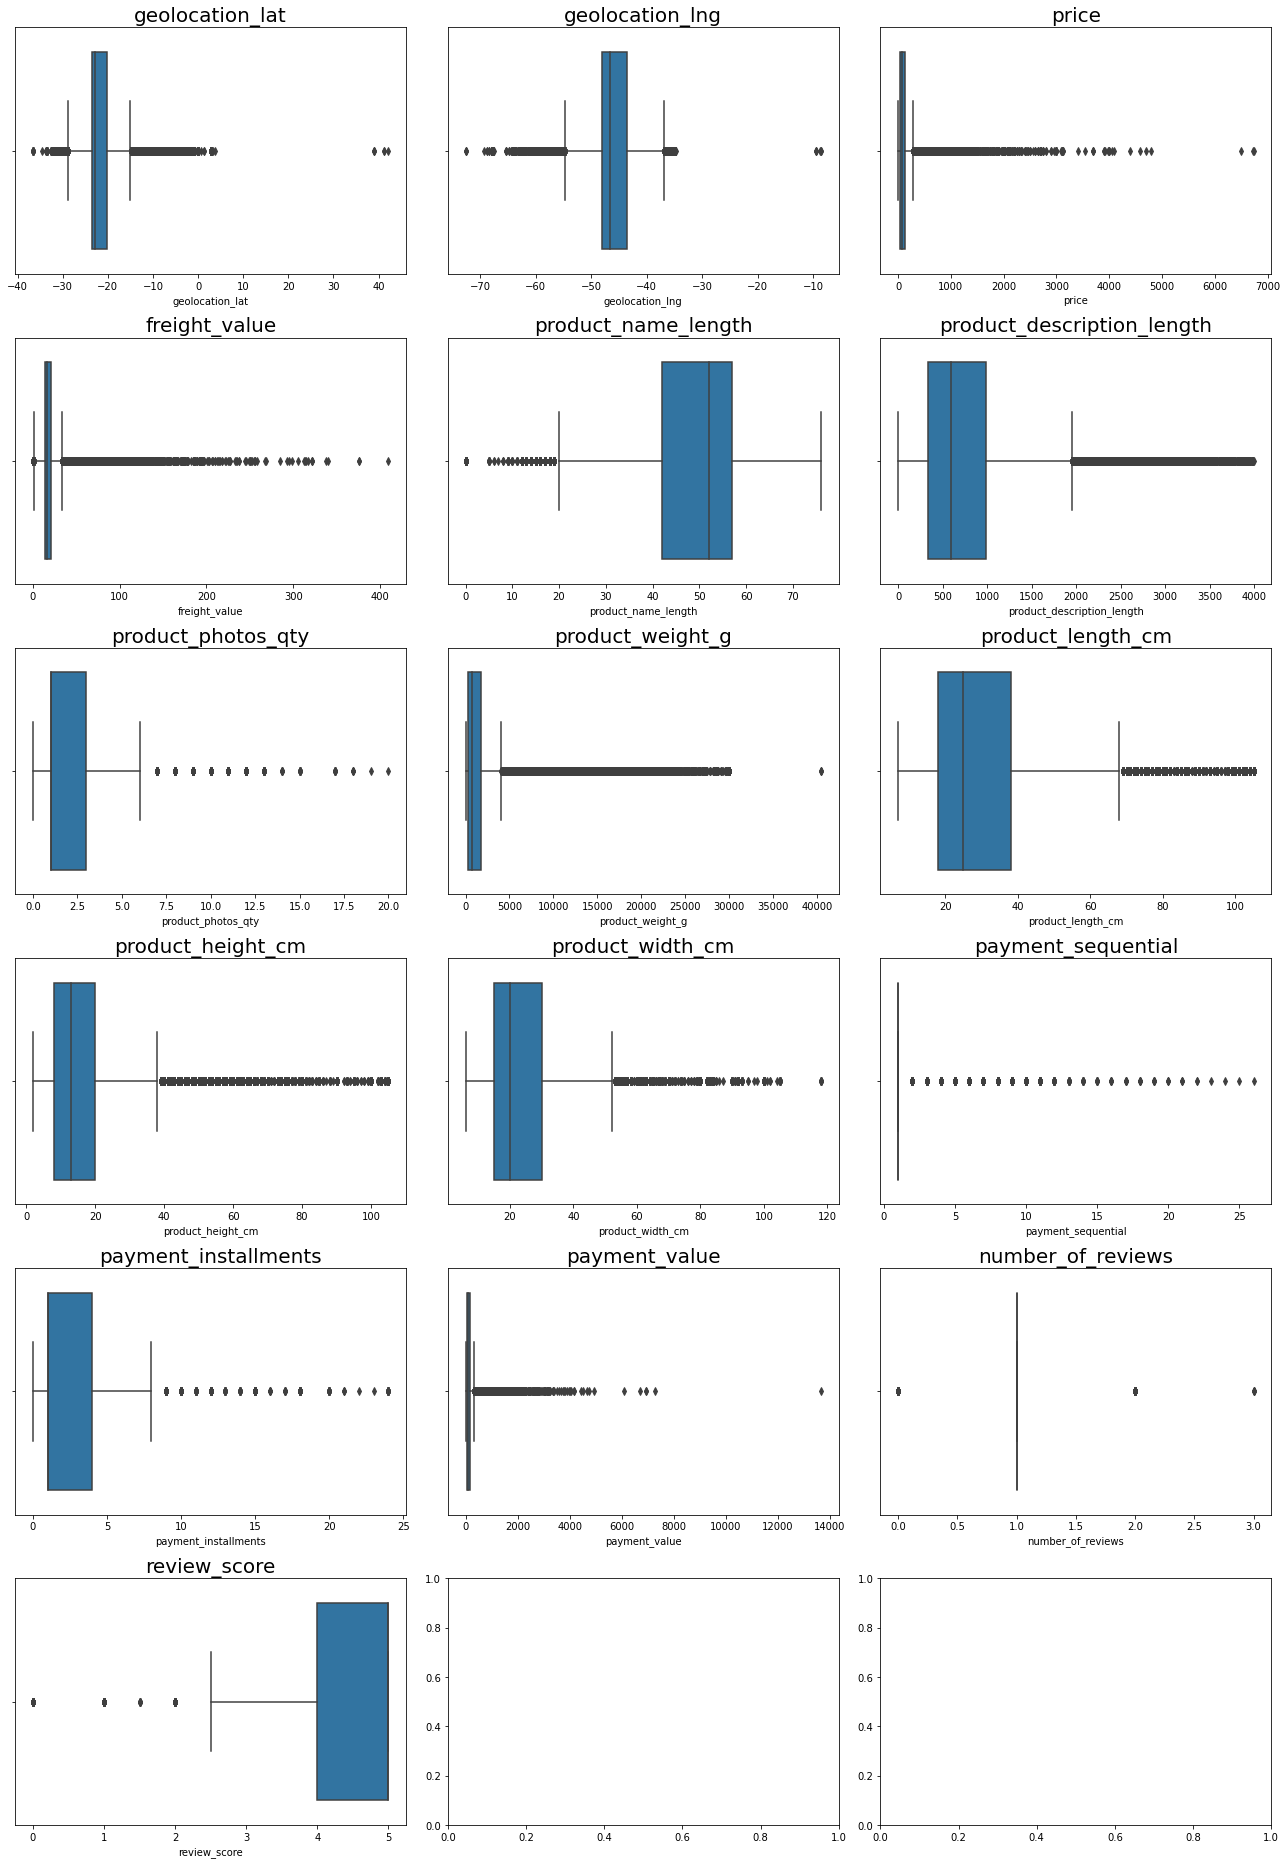

In [118]:
hp.plot_boxplots(df)

Number of quantitaive columns: 16


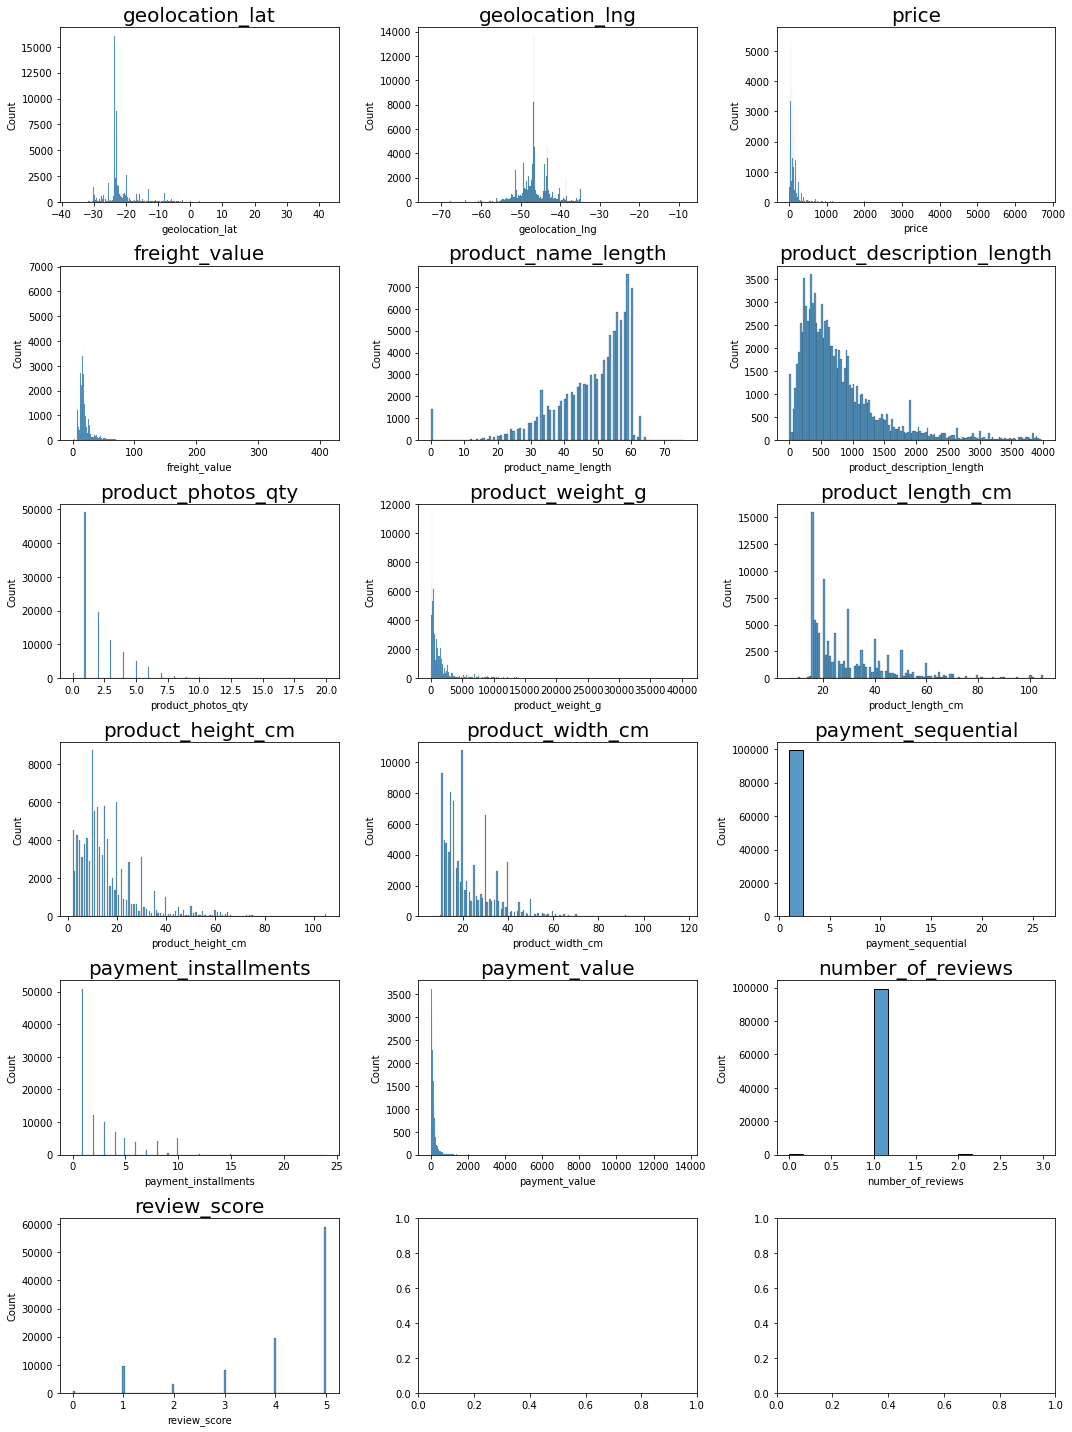

In [119]:
hp.plot_histplots(df)

In [120]:
df.product_category_name[df.price == 6735]

13633    houseware
Name: product_category_name, dtype: object

**Remarque**<br>
Il y a des valeurs aberrantes mais pas anormales.

### Passage au 'log'

In [121]:
# df = df_group_cat.copy()

In [122]:
# set columns to be converted to log
cols_to_log = [
    "price",
    "payment_value",
]
print(f"DataFrame shape before: {df.shape}")
df = hp.convert_to_log(df, cols_to_log, drop=True)
df_log = df.copy()
print(f"DataFrame shape after : {df.shape}")

DataFrame shape before: (100736, 33)
DataFrame shape after : (100736, 33)


In [123]:
df.to_csv('data/df_log.csv', index=False)

## Analyses PCA - Avant Feature Engineering

In [4]:
df = pd.read_csv('data/df_log.csv')

In [124]:
# df = df_log.copy()

In [6]:
df_quanti = hp.create_quanti_df(df)
df_quanti.shape

(100736, 18)

In [13]:
scaler = StandardScaler()
df_quanti_ss = scaler.fit_transform(df_quanti)

In [15]:
# initialize pca
pca = PCA(n_components=0.95)
# fit data
pca.fit(df_quanti_ss)
print(f"Original number of features: {df_quanti_ss.shape[1]:>23}.")
print(f"Number of features after dimensionality reduction: {pca.n_components_}.")

Original number of features:                      16.
Number of features after dimensionality reduction: 14.


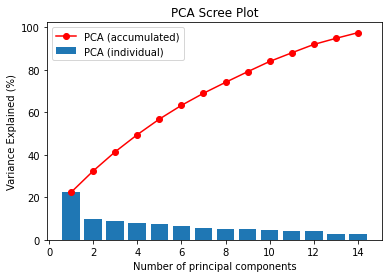

In [16]:
hp.plot_scree(df=df_quanti_ss, pca=pca)

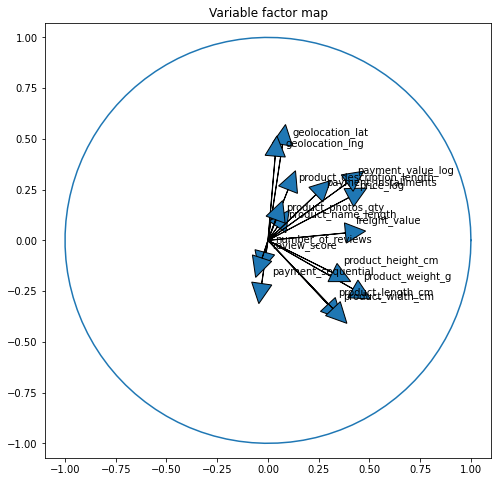

In [129]:
hp.plot_pca_circle(df_quanti, pca=pca)

### MinMaxScaler

In [130]:
# df_quanti = hp.create_quanti_df(df)
df_quanti = hp.create_quanti_df(df_log)
df_quanti.shape

(100736, 16)

In [136]:
mmscaler = MinMaxScaler()
df_quanti_mmss = mmscaler.fit_transform(df_quanti)

In [137]:
# initialize pca
pca = PCA(n_components=0.95)
# fit data
pca.fit(df_quanti_mmss)
print(f"Original number of features: {df_quanti_mmss.shape[1]:>23}.")
print(f"Number of features after dimensionality reduction: {pca.n_components_}.")

Original number of features:                      16.
Number of features after dimensionality reduction: 10.


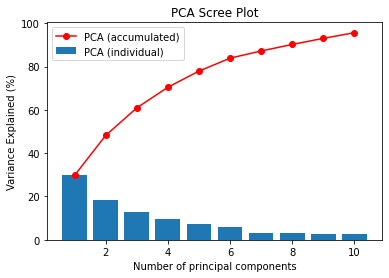

In [138]:
hp.plot_scree(df=df_quanti_mmss, pca=pca)

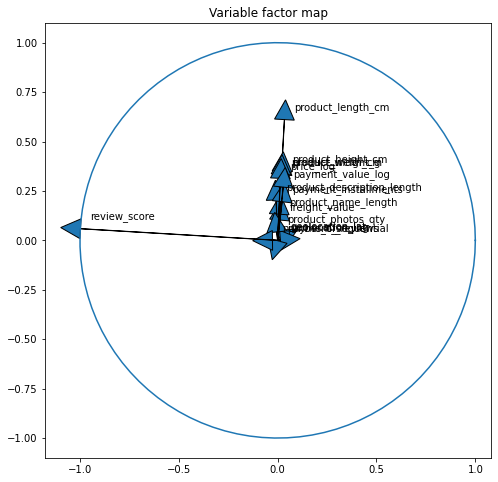

In [139]:
hp.plot_pca_circle(df_quanti, pca=pca)

# Feature Engineering

In [ ]:
# df = df_log.copy()

## Transformation de 'latitude' et 'longitude' en distance

In [140]:
# Impute the latitude and longitude values with those of Sau Paulo
df.geolocation_lat[df.geolocation_lat.isna()] = -23.53377
df.geolocation_lng[df.geolocation_lng.isna()] = -46.625290

In [141]:
# set latitude and longtitude of Sau Paulo
sau_paulo = (-23.5337, -46.625290) # (lat, long)

In [142]:
df["distance"] = [
    haversine(sau_paulo, (df.geolocation_lat[idx], df.geolocation_lng[idx]))
    for idx in range(len(df))
]

## Freight_value to price ratio

In [143]:
df["freight_price_ratio"] = df.freight_value / df.price_log
df[["freight_price_ratio", "freight_value", "price_log"]].head()

,freight_price_ratio,freight_value,price_log
0,4.531678,21.88,4.828234
1,8.202700,46.48,5.666427
2,3.600330,17.79,4.941214
3,4.662456,23.36,5.010235
4,4.091518,22.25,5.438079


## Delai Livraison

In [144]:
df["delivery_time_days"] = (
    df.order_delivered_customer_date - df.order_purchase_timestamp
).dt.days
df[
    ["delivery_time_days", "order_delivered_customer_date", "order_purchase_timestamp"]
].sample(5)

,delivery_time_days,order_delivered_customer_date,order_purchase_timestamp
55330,16,2018-03-16 00:58:39,2018-02-27 16:20:42
66266,7,2018-08-28 20:22:07,2018-08-21 16:25:09
8615,4,2017-09-25 19:23:27,2017-09-21 08:17:13
42683,9,2018-08-28 00:37:26,2018-08-18 22:41:34
8472,23,2018-03-28 17:34:23,2018-03-05 14:47:54


## Respect la Date de Livraison Estimée

In [145]:
df["Respect_delivery_bool"] = np.where(
    df.order_delivered_customer_date < df.order_estimated_delivery_date, 1, 0
)
df.shape

(100736, 37)

In [146]:
df["Respect_delivery_value"] = (df.order_delivered_customer_date - df.order_estimated_delivery_date).dt.days

In [147]:
df[
    [
        "Respect_delivery_bool",
        "Respect_delivery_value",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ]
].sample(5)

,Respect_delivery_bool,Respect_delivery_value,order_delivered_customer_date,order_estimated_delivery_date
59665,1,-12,2018-06-16 17:48:30,2018-06-28
66385,1,-12,2018-05-09 20:52:42,2018-05-21
93503,1,-23,2017-10-07 16:12:47,2017-10-30
57116,1,-15,2018-08-30 14:34:39,2018-09-14
10037,1,-17,2018-05-04 22:31:05,2018-05-21


## Respect la Date de Transport Estimée

In [148]:
df["Respect_shipping_bool"] = np.where(
    df.order_delivered_customer_date < df.shipping_limit_date, 1, 0
)
df.shape

(100736, 39)

In [149]:
df["Respect_shipping_value"] = (df.order_delivered_customer_date - df.shipping_limit_date).dt.days

In [150]:
df[
    [
        "Respect_delivery_bool",
        "Respect_delivery_value",
        "order_delivered_customer_date",
        "shipping_limit_date",
    ]
].sample(5)

,Respect_delivery_bool,Respect_delivery_value,order_delivered_customer_date,shipping_limit_date
27308,1,-21,2017-10-05 20:42:34,2017-10-04 12:56:23
42250,1,-16,2018-05-07 22:03:53,2018-05-07 02:38:31
63252,1,-1,2017-08-17 16:53:48,2017-08-02 17:23:19
26781,1,-17,2018-04-16 19:22:38,2018-04-17 09:30:46
49152,1,-27,2018-06-28 12:54:48,2018-06-26 17:00:45


## Volume d'Article

In [151]:
df["volumn_cm3"] = df.product_height_cm * df.product_length_cm * df.product_width_cm
df[["volumn_cm3", "product_height_cm", "product_length_cm", "product_width_cm"]].sample(5)

,volumn_cm3,product_height_cm,product_length_cm,product_width_cm
40935,2430.0,9.0,18.0,15.0
63881,4913.0,17.0,17.0,17.0
47640,31616.0,52.0,32.0,19.0
8594,5500.0,5.0,100.0,11.0
93970,20000.0,10.0,50.0,40.0


## Ratio de 'freight_value' à Volume d'Article

In [152]:
df["freight_to_vol_ratio"] = df.freight_value / df.volumn_cm3
df[["freight_to_vol_ratio", "freight_value", "volumn_cm3"]].sample(5)

,freight_to_vol_ratio,freight_value,volumn_cm3
4187,0.000539,22.80,42320.0
78647,0.000861,27.13,31500.0
66458,0.000859,12.40,14440.0
89179,0.006474,18.23,2816.0
34571,0.007463,19.21,2574.0


## Nombre de produits par achat

In [153]:
df_num_pdt_per_command = df.groupby("order_id").agg({"product_id": "count"}).reset_index()
df_num_pdt_per_command.rename(columns={"product_id": "num_products_per_buy"}, inplace=True)
df_num_pdt_per_command.head()

,order_id,num_products_per_buy
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [154]:
df["num_products_per_buy"] = df["order_id"].map(
    df_num_pdt_per_command.set_index("order_id")["num_products_per_buy"]
)
df[["order_id", "num_products_per_buy"]][df.num_products_per_buy>2].head(12)

,order_id,num_products_per_buy
66,db97652cf517d2cd03db63dec489ca62,3
67,db97652cf517d2cd03db63dec489ca62,3
68,db97652cf517d2cd03db63dec489ca62,3
301,dfaa4ce943a8dba10b754befb76fdb49,3
302,dfaa4ce943a8dba10b754befb76fdb49,3
303,dfaa4ce943a8dba10b754befb76fdb49,3
516,2297a47ed15e99116ac68cdb390cd700,5
517,2297a47ed15e99116ac68cdb390cd700,5
518,2297a47ed15e99116ac68cdb390cd700,5
519,2297a47ed15e99116ac68cdb390cd700,5


## Fréquance d'Achat d'un Client par Mois

In [155]:
print(df.order_purchase_timestamp.max())
print(df.order_purchase_timestamp.min())

2018-08-29 15:00:37
2016-10-03 09:44:50


In [156]:
m2016 = 3
m2017 = 12
m2018 = 8

In [157]:
df_2016 = df[["customer_unique_id", "order_purchase_timestamp"]][
    df.order_purchase_timestamp.dt.year == 2016
]
df_2017 = df[["customer_unique_id", "order_purchase_timestamp"]][
    df.order_purchase_timestamp.dt.year == 2017
]
df_2018 = df[["customer_unique_id", "order_purchase_timestamp"]][
    df.order_purchase_timestamp.dt.year == 2018
]
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)

(288, 2)
(45705, 2)
(54743, 2)


In [158]:
df_2016 = (
    df_2016.groupby("customer_unique_id")
    .agg({"order_purchase_timestamp": "count"})
    .reset_index()
)
df_2016.rename(columns={"order_purchase_timestamp": "purchase_freq_y"}, inplace=True)
df_2016["purchase_freq_m"] = round(df_2016.purchase_freq_y / m2016, 2)
df_2016.head()

,customer_unique_id,purchase_freq_y,purchase_freq_m
0,0032c76b20340da25249092a268ce66c,1,0.33
1,01f156677184504063bd19739f924af1,1,0.33
2,0636d30c77f0f9cfad81f1c9b58c791f,1,0.33
3,06bdfbbe1857c3c925ec81abfb1c9666,1,0.33
4,0829f7df6577d5a4b65439bea701405f,1,0.33


In [159]:
df_2017 = (
    df_2017.groupby("customer_unique_id")
    .agg({"order_purchase_timestamp": "count"})
    .reset_index()
)
df_2017.rename(columns={"order_purchase_timestamp": "purchase_freq_y"}, inplace=True)
df_2017["purchase_freq_m"] = round(df_2017.purchase_freq_y / m2017, 2)
df_2017.head()

,customer_unique_id,purchase_freq_y,purchase_freq_m
0,0000f46a3911fa3c0805444483337064,1,0.08
1,0000f6ccb0745a6a4b88665a16c9f078,1,0.08
2,0004aac84e0df4da2b147fca70cf8255,1,0.08
3,0005e1862207bf6ccc02e4228effd9a0,1,0.08
4,0006fdc98a402fceb4eb0ee528f6a8d4,1,0.08


In [160]:
df_2018 = (
    df_2018.groupby("customer_unique_id")
    .agg({"order_purchase_timestamp": "count"})
    .reset_index()
)
df_2018.rename(columns={"order_purchase_timestamp": "purchase_freq_y"}, inplace=True)
df_2018["purchase_freq_m"] = round(df_2018.purchase_freq_y / m2018, 2)
df_2018.head()

,customer_unique_id,purchase_freq_y,purchase_freq_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1,0.12
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0.12
2,0004bd2a26a76fe21f786e4fbd80607f,1,0.12
3,00050ab1314c0e55a6ca13cf7181fecf,1,0.12
4,00053a61a98854899e70ed204dd4bafe,1,0.12


In [161]:
df["purchase_freq_y2016"] = df["customer_unique_id"].map(
    df_2016.set_index("customer_unique_id")["purchase_freq_y"]
)
df["purchase_freq_y2017"] = df["customer_unique_id"].map(
    df_2017.set_index("customer_unique_id")["purchase_freq_y"]
)
df["purchase_freq_y2018"] = df["customer_unique_id"].map(
    df_2018.set_index("customer_unique_id")["purchase_freq_y"]
)
df["purchase_freq_m2016"] = df["customer_unique_id"].map(
    df_2016.set_index("customer_unique_id")["purchase_freq_m"]
)

df["purchase_freq_m2017"] = df["customer_unique_id"].map(
    df_2017.set_index("customer_unique_id")["purchase_freq_m"]
)

df["purchase_freq_m2018"] = df["customer_unique_id"].map(
    df_2018.set_index("customer_unique_id")["purchase_freq_m"]
)
df[
    [
        "purchase_freq_y2016",
        "purchase_freq_y2017",
        "purchase_freq_y2018",
        "purchase_freq_m2016",
        "purchase_freq_m2017",
        "purchase_freq_m2018",
    ]
] = df[
    [
        "purchase_freq_y2016",
        "purchase_freq_y2017",
        "purchase_freq_y2018",
        "purchase_freq_m2016",
        "purchase_freq_m2017",
        "purchase_freq_m2018",
    ]
].fillna(
    0
)
df[
    [
        "purchase_freq_y2016",
        "purchase_freq_y2017",
        "purchase_freq_y2018",
        "purchase_freq_m2016",
        "purchase_freq_m2017",
        "purchase_freq_m2018",
    ]
].isna().any()

purchase_freq_y2016    False
purchase_freq_y2017    False
purchase_freq_y2018    False
purchase_freq_m2016    False
purchase_freq_m2017    False
purchase_freq_m2018    False
dtype: bool

In [162]:
df["purchase_freq_y_ttl"] = (
    df.purchase_freq_y2016 + df.purchase_freq_y2017 + df.purchase_freq_y2018
) / 3
df["purchase_freq_m_ttl"] = (
    df.purchase_freq_m2016 + df.purchase_freq_m2017 + df.purchase_freq_m2018
) / 3
df.shape

(100736, 51)

## Même Ville Entre l'Achteur et le Vendeur

In [163]:
df["same_city"] = np.where(df.customer_city == df.seller_city, 1, 0)
df[["same_city", "customer_city", "seller_city"]].sample(5)

,same_city,customer_city,seller_city
99113,0,juscimeira,salto
27982,0,conselheiro lafaiete,pinhais
44672,0,sao paulo,atibaia
41095,0,uberlandia,ibitinga
10061,0,belo horizonte,sao jose do rio preto


## Même Etat Entre l'Achteur et le Vendeur

In [164]:
df["same_state"] = np.where(df.customer_state == df.seller_state, 1, 0)
df[["same_state", "customer_state", "seller_state"]].sample(5)

,same_state,customer_state,seller_state
96539,0,GO,SP
89060,0,MG,SP
1842,0,RJ,SP
16530,0,MG,SP
11026,1,SP,SP


## Week-end VS. Semaine

In [165]:
df["weekend"] = np.where((df.order_purchase_timestamp.dt.weekday == 5) | (df.order_purchase_timestamp.dt.weekday == 6), 1, 0)
df[["weekend", "order_purchase_timestamp"]].sample(5)

,weekend,order_purchase_timestamp
73741,0,2017-03-23 22:09:52
58049,1,2017-06-04 17:22:51
94527,1,2017-12-02 20:45:44
83729,1,2017-07-23 13:19:02
94370,0,2017-08-16 20:22:28


## Vacances

In [166]:
m2016 = 3
m2017 = 12
m2018 = 8
# Easter: 16/4/2017, 1/4/2018

In [167]:
easter2017 = datetime.strptime('2017-04-16', '%Y-%m-%d').date()
easter2018 = datetime.strptime('2018-04-01', '%Y-%m-%d').date()

In [168]:
df["holiday"] = np.where(
    (
        ((df.order_purchase_timestamp.dt.date - easter2017) <= pd.Timedelta(14, "D"))
        | ((df.order_purchase_timestamp.dt.date - easter2018) <= pd.Timedelta(14, "D"))
        | (df.order_purchase_timestamp.dt.month == 12)
    ),
    1,
    0,
)
df[["holiday", "order_purchase_timestamp"]].sample(5)

,holiday,order_purchase_timestamp
74963,1,2017-10-10 17:39:51
13864,0,2018-05-05 14:53:21
50313,0,2018-07-25 15:40:26
51665,0,2018-08-09 08:40:59
48705,1,2018-04-09 14:21:15


In [169]:
df_feature_eng = df.copy()
df.to_csv("data/df_feature_engineering.csv", index=False)

# Analyse de Données -  Multivariée

In [170]:
df = df_feature_eng.copy()

Number of quantitaive columns: 38


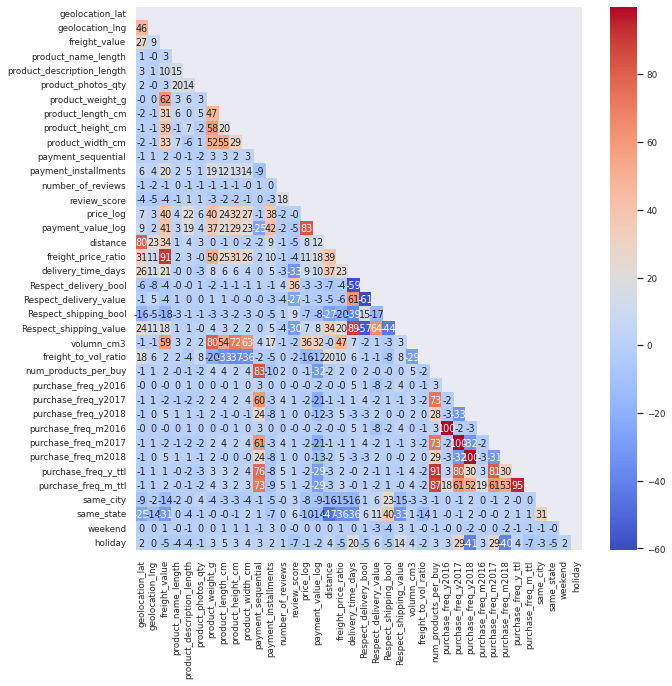

CPU times: user 4.82 s, sys: 628 ms, total: 5.44 s
Wall time: 5.21 s


In [171]:
%%time
hp.heatmap(df, scale=0.8)

1. all the ids

In [172]:
cols_to_drop = [
    "customer_zip_code_prefix",
    "geolocation_lat",
    "geolocation_lng",
    "freight_value",
    "order_delivered_customer_date",
    "order_id",
    "order_item_id",
    "product_id",
    "seller_id",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "payment_sequential",
    "payment_value_log",
    "Respect_delivery_value",
    "Respect_shipping_value",
    "purchase_freq_m2016",
    "purchase_freq_m2017",
    "purchase_freq_m2018",
    "purchase_freq_y_ttl",
    "purchase_freq_m_ttl",
]
len(cols_to_drop)

22

In [173]:
print('shape before dropping correlated columns: ', df.shape)
df.drop(columns=cols_to_drop, inplace=True)
print('shape after dropping correlated columns:  ', df.shape)

shape before dropping correlated columns:  (100736, 55)
shape after dropping correlated columns:   (100736, 33)


Number of quantitaive columns: 22


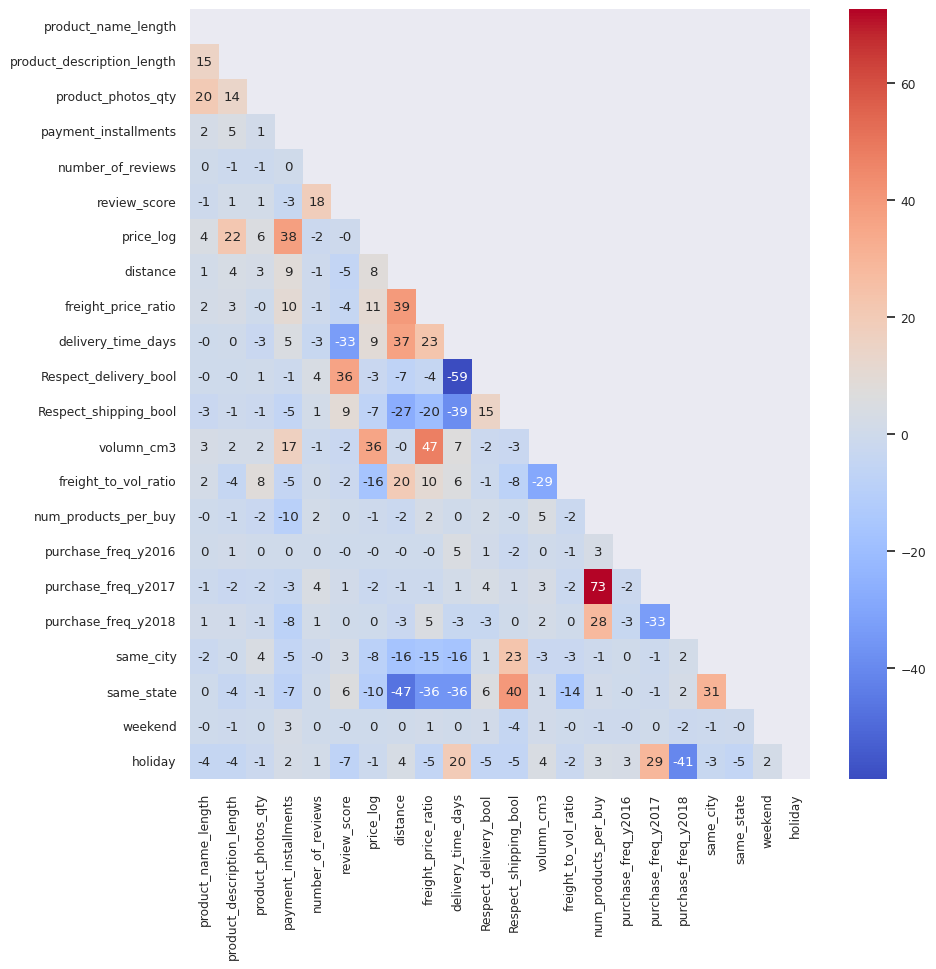

CPU times: user 1.81 s, sys: 305 ms, total: 2.11 s
Wall time: 1.89 s


In [174]:
%%time
hp.heatmap(df, scale=0.8)

In [175]:
cols_unnecessary = [
    "customer_city",
    "customer_state",
    "order_estimated_delivery_date",
    "shipping_limit_date",
    "seller_city",
    "seller_state",
]
print('shape before dropping unnecessary columns: ', df.shape)
df.drop(columns=cols_unnecessary, inplace=True)
df_corr = df.copy()
df.to_csv("data/df_corr.csv", index=False)
print('shape after dropping unnecessary columns:  ', df.shape)

shape before dropping unnecessary columns:  (100736, 33)
shape after dropping unnecessary columns:   (100736, 27)


# Encoding

In [176]:
df_quali = hp.create_quali_df(df)
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customer_unique_id     100736 non-null  object
 1   order_status           100736 non-null  object
 2   product_category_name  100736 non-null  object
 3   payment_type           100736 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [177]:
# check unique values for categorical variables
pd.Series({c: df[c].unique() for c in df_quali})

customer_unique_id       [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...
order_status                                         [delivered, canceled]
product_category_name    [office_furniture, houseware, entertainment_sp...
payment_type                    [credit_card, debit_card, voucher, boleto]
dtype: object

**Remarque**<br>
1. 'order_status' est boolean
2. Nous allons alors utiliser la technique 'Label Encoding' pour 'product_category_name'.
3. Pour 'payment_type', nous allons encoder avec la technique 'One Hot Encoding'.

## Transformation en Boolean

In [178]:
df = df_corr.copy()

In [179]:
# create a dictionary to map the boolean
order_dict = {
    "canceled": 0,
    "delivered" : 1,
}
# map the assigned numerical values to the original 'order_status' values
df['order_status_bool'] = df.order_status.map(order_dict)
df.shape

(100736, 28)

In [180]:
# double check the mapped result
df[["order_status", 'order_status_bool']][27470:27475]

,order_status,order_status_bool
27470,delivered,1
27471,delivered,1
27472,canceled,0
27473,delivered,1
27474,delivered,1


In [181]:
# drop the orginal 'order_status' column
df.drop(columns='order_status', inplace=True)
df.rename(columns={'order_status_bool':"order_status"}, inplace=True)
df_bool = df.copy()

## Label Encoding

In [182]:
df = df_bool.copy()

In [183]:
# count all the unique values in the 'product_category_name' column 
# and rank them in descending order
df.groupby("product_category_name")["product_category_name"].count().sort_values(ascending=False)

product_category_name
houseware               23567
electronics             14034
health_beauty           12088
entertainment_sports     8877
baby_kids                6833
watches_gifts            5670
auto                     3923
garden_tools             3819
cool_stuff               3707
office_furniture         3642
others                   3508
fashion                  2477
home_appliances          1970
home_construction        1923
missing                  1423
video_games              1068
food_drink                966
books                     812
art                       287
security                  142
Name: product_category_name, dtype: int64

In [184]:
# create a dictionary to map the label encoding
usetype_labels = {
    "houseware": 1,
    "electronics": 2,
    "health_beauty": 3,
    "entertainment_sports": 4,
    "baby_kids": 5,
    "watches_gifts": 6,
    "auto": 7,
    "garden_tools": 8,
    "cool_stuff": 9,
    "office_furniture": 10,
    "others": 11,
    "fashion": 12,
    "home_appliances": 13,
    "home_construction": 14,
    "missing": 15,
    "video_games": 16,
    "food_drink": 17,
    "books": 18,
    "art": 19,
    "security": 20,
}

# map the assigned numerical values to the original categorical values
df["product_category_label"] = df["product_category_name"].map(
    usetype_labels
)
df.shape

(100736, 28)

In [185]:
# double check the mapped result
df[
    [
        "product_category_name",
        "product_category_label",
    ]
].sample(10)

,product_category_name,product_category_label
71711,entertainment_sports,4
20929,electronics,2
5086,houseware,1
336,watches_gifts,6
60073,others,11
37089,fashion,12
44233,health_beauty,3
41819,electronics,2
25403,office_furniture,10
20632,health_beauty,3


In [186]:
# drop the orginal categorical columns
df.drop(columns=["product_category_name"], inplace=True)

# backup dataframe
df_label = df.copy()
df.shape

(100736, 27)

## One Hot Encoding

In [187]:
df = df_label.copy()

In [188]:
# perform one hot encoding
df = pd.get_dummies(df, columns=['payment_type'])#, dtype=int)
df.shape

(100736, 30)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100736 entries, 0 to 100735
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   customer_unique_id          100736 non-null  object        
 1   order_purchase_timestamp    100736 non-null  datetime64[ns]
 2   product_name_length         100736 non-null  float64       
 3   product_description_length  100736 non-null  float64       
 4   product_photos_qty          100736 non-null  float64       
 5   payment_installments        100736 non-null  float64       
 6   number_of_reviews           100736 non-null  float64       
 7   review_score                100736 non-null  float64       
 8   price_log                   100736 non-null  float64       
 9   distance                    100736 non-null  float64       
 10  freight_price_ratio         100736 non-null  float64       
 11  delivery_time_days          100736 non-

In [197]:
# calculate VIF
hp.calculate_vif(df.drop(columns=['customer_unique_id', 'order_purchase_timestamp']))

,Variable,Vif
22,order_status,18.62
4,number_of_reviews,15.35
6,price_log,11.07
10,Respect_delivery_bool,7.67
5,review_score,6.99
8,freight_price_ratio,3.15
21,holiday,2.91
2,product_photos_qty,2.69
0,product_name_length,2.43
1,product_description_length,2.43


**Remarque**<br>
Les VIF de colonnes 'payment_type' sont  < 0,15. Il n'y a pas de problème de multicolinéarité entre les colonnes 'payment_type'.

In [198]:
# backup dataframe
df_onehot = df.copy()

# save dataframe that is now ready for traning models
csv_path = 'data/df_model_final.csv'
df.to_csv(csv_path, index=False)

## Analyses PCA - Après Feature Engineering et Encoding

In [369]:
df = pd.read_csv('data/df_model_final.csv')

In [370]:
df_quanti = hp.create_quanti_df(df)
df_quanti.shape

(100736, 28)

In [372]:
scaler = StandardScaler()
df_quanti_ss = scaler.fit_transform(df_quanti)

### new features engineering

In [373]:
# initialize pca
pca = PCA(n_components=0.95)
# fit data
pca.fit(df_quanti_ss)
print(f"Original number of features: {df_quanti_ss.shape[1]:>23}.")
print(f"Number of features after dimensionality reduction: {pca.n_components_}.")

Original number of features:                      28.
Number of features after dimensionality reduction: 23.


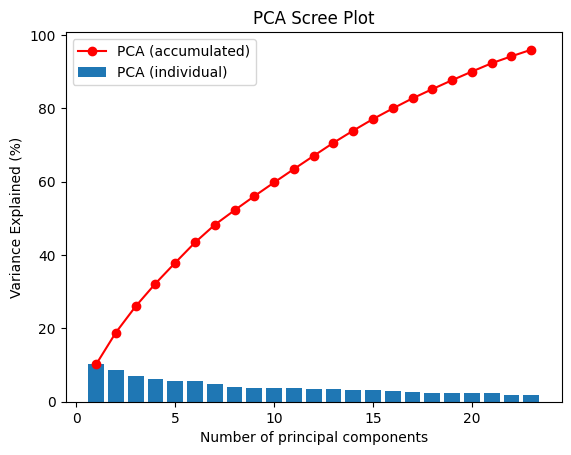

In [374]:
hp.plot_scree(df=df_quanti_ss, pca=pca)

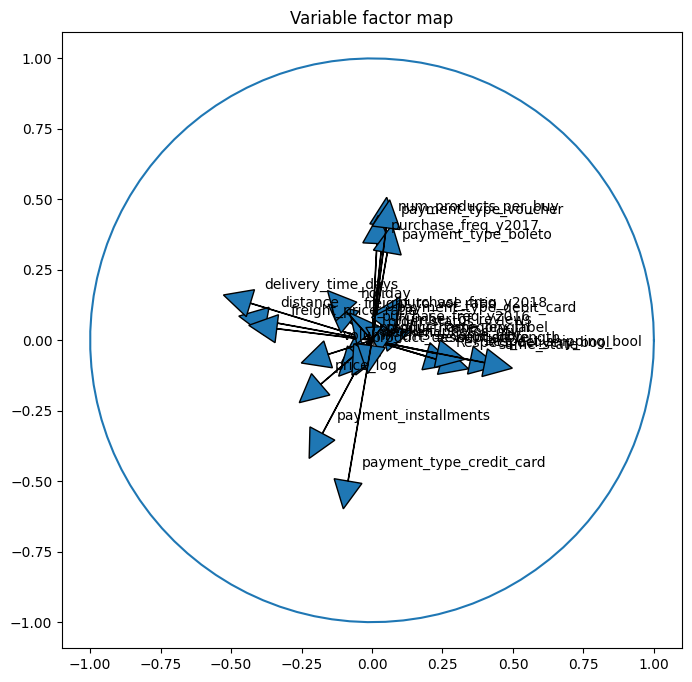

In [375]:
hp.plot_pca_circle(df_quanti, pca=pca)

### MinMaxScaler

In [379]:
from sklearn.preprocessing import MinMaxScaler

In [380]:
mmscaler = MinMaxScaler()
df_quanti_mmss = mmscaler.fit_transform(df_quanti)

#### new features engineering

In [381]:
# initialize pca
pca = PCA(n_components=0.95)
# fit data
pca.fit(df_quanti_mmss)
print(f"Original number of features: {df_quanti_ss.shape[1]:>23}.")
print(f"Number of features after dimensionality reduction: {pca.n_components_}.")

Original number of features:                      28.
Number of features after dimensionality reduction: 12.


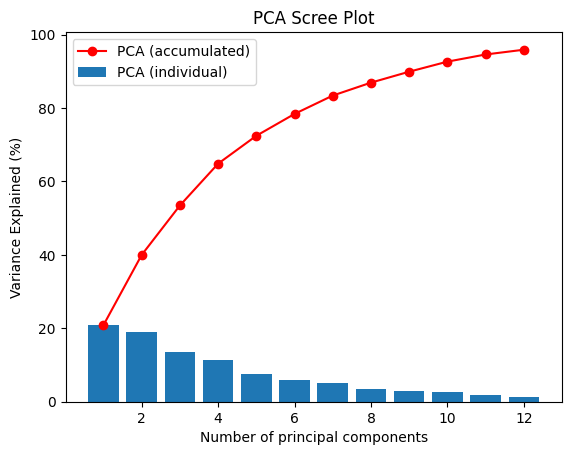

In [382]:
hp.plot_scree(df=df_quanti_ss, pca=pca)

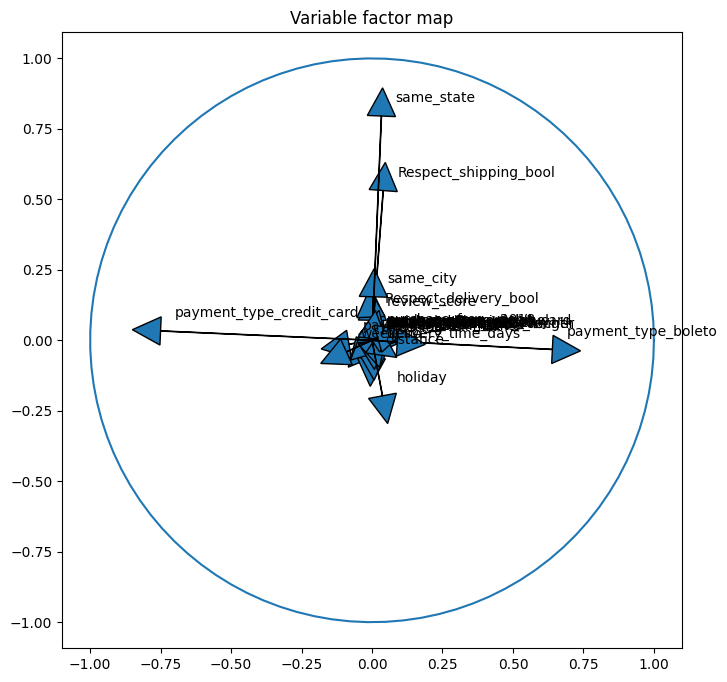

In [383]:
hp.plot_pca_circle(df_quanti, pca=pca)

### old features engineering

In [7]:
# initialize pca
pca = PCA(n_components=0.95)
# fit data
pca.fit(df_quanti_ss)
print(f"Original number of features: {df_quanti_ss.shape[1]:>23}.")
print(f"Number of features after dimensionality reduction: {pca.n_components_}.")

Original number of features:                      27.
Number of features after dimensionality reduction: 22.


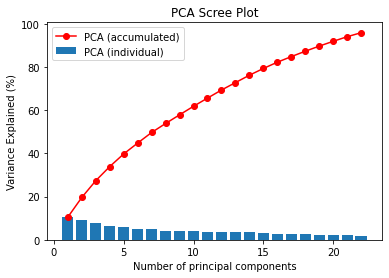

In [8]:
hp.plot_scree(df=df_quanti_ss, pca=pca)

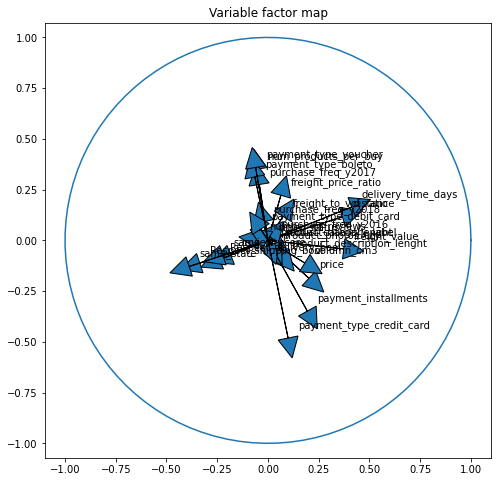

In [9]:
hp.plot_pca_circle(df_quanti, pca=pca)